# Analysis of Traffic Stops in San Francisco
By Gustavo Carillo-Castro, Huan Nguyen, and Katie Tweed

## 1. Dataset Selection and Initial Exploration

We had selected the [San Francisco Traffic Stop dataset](https://openpolicing.stanford.edu/data/), which contains stop data for the city of San Francisco from Dec 2006 - Jun 2016. The dataset consists of 905,070 rows and 22 columns.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

san_fran_df = pd.read_csv('/content/drive/MyDrive/CS 410 Data w  Python/ca_san_francisco_2020_04_01.csv')
san_fran_df.head()

,raw_row_number,date,time,location,lat,lng,district,subject_age,subject_race,subject_sex,...,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop,raw_search_vehicle_description,raw_result_of_contact_description
0,869921,2014-08-01,00:01:00,MASONIC AV & FELL ST,37.773004,-122.445873,NaN,NaN,asian/pacific islander,female,...,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
1,869922,2014-08-01,00:01:00,GEARY&10TH AV,37.780898,-122.468586,NaN,NaN,black,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
2,869923,2014-08-01,00:15:00,SUTTER N OCTAVIA ST,37.786919,-122.426718,NaN,NaN,hispanic,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
3,869924,2014-08-01,00:18:00,3RD ST & DAVIDSON,37.746380,-122.392005,NaN,NaN,hispanic,male,...,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
4,869925,2014-08-01,00:19:00,DIVISADERO ST. & BUSH ST.,37.786348,-122.440003,NaN,NaN,white,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation


##2. Data Import and Cleaning

In [ ]:
san_fran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905070 entries, 0 to 905069
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   raw_row_number                     905070 non-null  object 
 1   date                               905070 non-null  object 
 2   time                               905035 non-null  object 
 3   location                           905027 non-null  object 
 4   lat                                903373 non-null  float64
 5   lng                                903373 non-null  float64
 6   district                           852883 non-null  object 
 7   subject_age                        846182 non-null  float64
 8   subject_race                       905070 non-null  object 
 9   subject_sex                        905070 non-null  object 
 10  type                               905070 non-null  object 
 11  arrest_made                        9050

The following columns:<br>
`raw_row_number`<br>
`lat`<br>
`lng`<br>
`district`<br>
`type`<br>
`contraband_found`<br>
`search_basis`<br>
`raw_search_vehicle_description`<br>
are dropped from the dataset since they either contain null values for most of the rows (`contraband_found` and `search_basis`) or are not relevant to our analysis questions. Removing these unnecessary columns makes our dataset cleaner and reduce memory usage.

In [ ]:
columns_to_drop = np.array(['raw_row_number', 'lat', 'lng', 'district', 'type', 'contraband_found', 'search_basis', 'raw_search_vehicle_description'])
cleaned_df = san_fran_df.copy()
cleaned_df = cleaned_df.drop(columns_to_drop, axis=1)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905070 entries, 0 to 905069
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   date                               905070 non-null  object 
 1   time                               905035 non-null  object 
 2   location                           905027 non-null  object 
 3   subject_age                        846182 non-null  float64
 4   subject_race                       905070 non-null  object 
 5   subject_sex                        905070 non-null  object 
 6   arrest_made                        905070 non-null  bool   
 7   citation_issued                    905070 non-null  bool   
 8   warning_issued                     905070 non-null  bool   
 9   outcome                            889389 non-null  object 
 10  search_conducted                   905070 non-null  bool   
 11  search_vehicle                     9050

In [ ]:
cleaned_df['outcome'] = cleaned_df['outcome'].fillna('clear')
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905070 entries, 0 to 905069
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   date                               905070 non-null  object 
 1   time                               905035 non-null  object 
 2   location                           905027 non-null  object 
 3   subject_age                        846182 non-null  float64
 4   subject_race                       905070 non-null  object 
 5   subject_sex                        905070 non-null  object 
 6   arrest_made                        905070 non-null  bool   
 7   citation_issued                    905070 non-null  bool   
 8   warning_issued                     905070 non-null  bool   
 9   outcome                            905070 non-null  object 
 10  search_conducted                   905070 non-null  bool   
 11  search_vehicle                     9050

We found that the `outcome` column contains `NaN` for rows where the corresponding `arrest_made`, `citation_issued`, and `warning_issued` columns contain `False`. Based on this observation, we assumed that a value of `NaN` in the `outcome` column indicates no action was taken during the stop and replaced all occurences of `NaN` in `outcome` column is replaced with the string 'clear' to indicate that the subject was neither arrested nor issued a citation or warning.

In [ ]:
separate_dates = cleaned_df.copy()
separate_dates['date'] = pd.to_datetime(separate_dates['date'])
separate_dates['day'] = separate_dates['date'].dt.day
separate_dates['month'] = separate_dates['date'].dt.month
separate_dates['year'] = separate_dates['date'].dt.year
separate_dates.rename(columns={'district': 'police_district'}, inplace=True)
separate_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905070 entries, 0 to 905069
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   date                               905070 non-null  datetime64[ns]
 1   time                               905035 non-null  object        
 2   location                           905027 non-null  object        
 3   subject_age                        846182 non-null  float64       
 4   subject_race                       905070 non-null  object        
 5   subject_sex                        905070 non-null  object        
 6   arrest_made                        905070 non-null  bool          
 7   citation_issued                    905070 non-null  bool          
 8   warning_issued                     905070 non-null  bool          
 9   outcome                            905070 non-null  object        
 10  search_conducted    

The `data` and `time` columns are converted to type `dateime64` to enable easier extraction of time attributes such as day, month, and year; and allow for time-based analysis and filtering.

In [ ]:
separate_dates.head()

,date,time,location,subject_age,subject_race,subject_sex,arrest_made,citation_issued,warning_issued,outcome,search_conducted,search_vehicle,reason_for_stop,raw_result_of_contact_description,day,month,year
0,2014-08-01,00:01:00,MASONIC AV & FELL ST,NaN,asian/pacific islander,female,False,False,True,warning,False,False,Mechanical or Non-Moving Violation (V.C.),Warning,1,8,2014
1,2014-08-01,00:01:00,GEARY&10TH AV,NaN,black,male,False,True,False,citation,False,False,Mechanical or Non-Moving Violation (V.C.),Citation,1,8,2014
2,2014-08-01,00:15:00,SUTTER N OCTAVIA ST,NaN,hispanic,male,False,True,False,citation,False,False,Mechanical or Non-Moving Violation (V.C.),Citation,1,8,2014
3,2014-08-01,00:18:00,3RD ST & DAVIDSON,NaN,hispanic,male,False,False,True,warning,False,False,Mechanical or Non-Moving Violation (V.C.),Warning,1,8,2014
4,2014-08-01,00:19:00,DIVISADERO ST. & BUSH ST.,NaN,white,male,False,True,False,citation,False,False,Mechanical or Non-Moving Violation (V.C.),Citation,1,8,2014


##3. Exploratory Data Analysis (EDA)


In [ ]:
#Determines the total number of stops per day of the month.
stops_per_month_day = separate_dates['day'].value_counts()
stops_per_month_day

,count
day,
11,31402
2,31135
9,30962
12,30633
3,30611
5,30565
17,30354
18,30261
14,30082


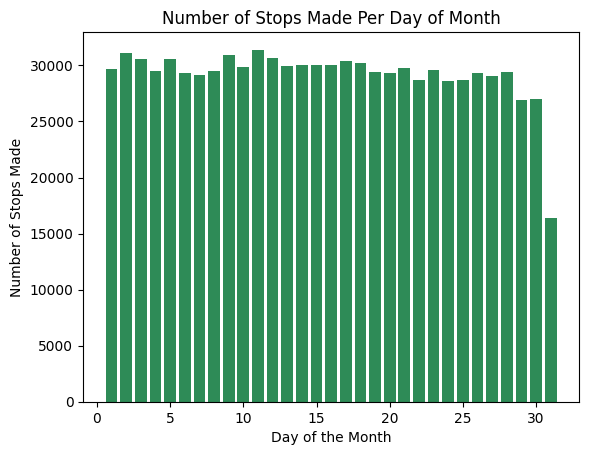

In [ ]:
plt.bar(stops_per_month_day.index, stops_per_month_day.values, color='seagreen')
plt.ylabel('Number of Stops Made')
plt.xlabel('Day of the Month')
plt.title('Number of Stops Made Per Day of Month')

plt.show()

The histogram shows that the number of traffic stops are fairly evenly distributed across the days of the month. However, the 31st has noticeably fewer stops compared to the other days, which may be because only a few months have a 31st day.     
It's good to mention that California has laws meant to outlaw the use of Police quotas, but certain CA police depts. such as LAPD have had lawsuits relating to quotas as recently as 2014.

In [ ]:
#Determines the count of each reason that resulted in a traffic stop
stop_reason_counts = separate_dates['reason_for_stop'].value_counts()
stop_reason_counts

,count
reason_for_stop,
Moving Violation,563105
Mechanical or Non-Moving Violation (V.C.),331477
MPC Violation,3542
Traffic Collision,1343
BOLO/APB/Warrant,1207
DUI Check,1037
Assistance to Motorist,930
Moving Violation|Mechanical or Non-Moving Violation (V.C.),171
Moving Violation|MPC Violation,14


The top five most common reasons resulting in a traffic stop are
1. Moving Violation
2. Mechanical or Non-Moving Violation (V.C.)
3. MPC Violation
4. Traffic Collision
5. BOLO/APB/Warrant

'Moving Violation' and 'Mechanical or Non-Moving Violation (V.C.)' are by far the most common reasons leading to a traffic stop, accounting for 563,105 and 331,477 traffic stops respectively. In contrast, all other reasons account for fewer than 3,545 stops. <br><br>
Moving violations tend to relate to driving related infractions such as speeding, running reds, DUI, reckless driving, illegal turns, etc. V.C often refer to expired registration tags, missing/obscured license plates, broken lights, or vehicle mods.

In [ ]:
outcome_counts = separate_dates.groupby('outcome')
outcome_counts = outcome_counts['outcome'].count()
outcome_counts

,outcome
outcome,
arrest,11925
citation,631602
clear,15681
warning,245862


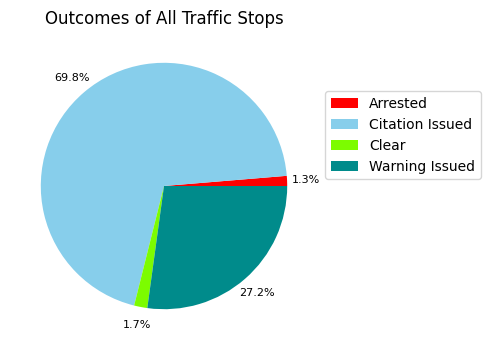

In [ ]:
plt.figure(figsize=(4, 4), dpi=100)

outcome_labels = np.array(['Arrested', 'Citation Issued', 'Clear', 'Warning Issued'])
color_labels = np.array(['red', 'skyblue', 'lawngreen', 'darkcyan'])

arrested = outcome_counts.iloc[0]           #Retrieves the number of times a subject was arrested following a traffic stop.
citation_issued = outcome_counts.iloc[1]    #Retrieves the number of times a citation was issued following a traffic stop.
clear = outcome_counts.iloc[2]              #Retrieves the number of times a subject was not arrested or issued a citation or warning.
warning_issued = outcome_counts.iloc[3]     #Retrieves the number of times a warning was issued following a traffic stop.

plt.pie([arrested, citation_issued, clear, warning_issued], colors=color_labels, autopct='%1.1f%%', textprops={'fontsize': 8}, pctdistance=1.15)
plt.legend(loc='lower left', labels=outcome_labels, bbox_to_anchor=(1,0.5))
plt.title('Outcomes of All Traffic Stops')
plt.show()

The pie chart shows that Citation Issued accounted for the overwhelming majority of traffic stop outcomes. Warning Issued was the second most common traffic stop outcome by a significant margin. Both Arrested and Clear each accounted for less than 2% of traffic stop outcomes. These results indicate that 97% of the subjects in the dataset received some form of reprimand or disciplinary action, although very few suffered arrest. Moreover, only 1.7% of all subjects  in the dataset avoided any form of penalty.

In [ ]:
separate_dates['subject_age'].describe()

,subject_age
count,846182.000000
mean,37.818577
std,13.632684
min,10.000000
25%,27.000000
50%,35.000000
75%,47.000000
max,100.000000


The average age of drivers in the dataset is ~37.82 years.

The standard deviation is ~13.63 years, which indicates a moderate spread in age.

The minimum driver's age recorded is 10 years old, which might indicate a data entry error or an exceptional case.

25% of drivers in the dataset are aged 27 or younger.<br>
50% of drivers in the dataset are aged 35 or younger.<br>
75% of drivers in the dataset are aged 47 or younger.<br>

The maximum driver's age recorded is 100 years old, which is an outlier.

In [ ]:
age_counts = separate_dates['subject_age'].value_counts()
age_counts

,count
subject_age,
25.0,32958
30.0,30355
26.0,27836
27.0,27540
28.0,27339
...,...
96.0,5
97.0,4
100.0,4


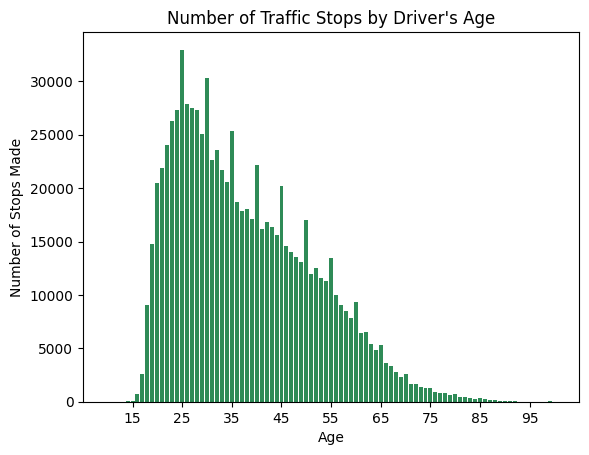

In [ ]:
plt.bar(age_counts.index, age_counts.values, color='seagreen')
plt.ylabel('Number of Stops Made')
plt.xlabel('Age')
plt.title('Number of Traffic Stops by Driver\'s Age')
plt.xticks(np.arange(15, 100, 10))
plt.show()

The histogram is strongly right-skewed, showing the majority of traffic stops involve younger drivers, and the frequency of stops decreases as age increases.
The highest concentration of stops occurs around age 23, with the number exceeding 30,000. After age 30, the frequency of stops steadily declines, with relatively few involving drivers over the age of 70.   
This of course does not explain whether younger people are stopped more, or if they tend to drive more as this is simply counting the age groups stopped, not normalized to be per capita/percent of a driving age range.

In [ ]:
race_counts = separate_dates['subject_race'].value_counts()
race_counts

,count
subject_race,
white,372318
asian/pacific islander,157684
black,152196
hispanic,116014
other,106858


Text(0.5, 1.0, 'Distribution of Traffic Stops by Race')

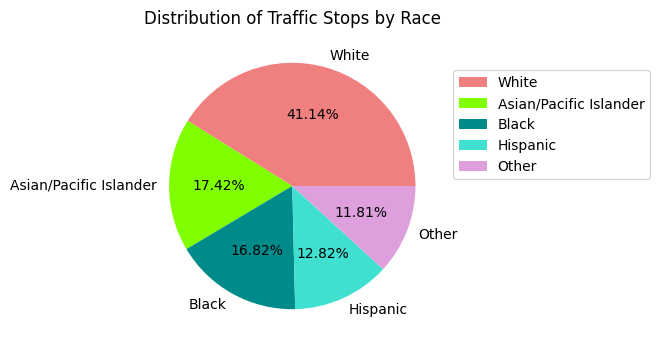

In [ ]:
white = race_counts['white']
asian_or_pacific_islander = race_counts['asian/pacific islander']
black = race_counts['black']
hispanic = race_counts['hispanic']
other = race_counts['other']

plt.figure(figsize=(4, 4), dpi=100)

race_labels = np.array(['White', 'Asian/Pacific Islander', 'Black', 'Hispanic', 'Other'])
color_labels = np.array(['lightcoral', 'chartreuse', 'darkcyan', 'turquoise', 'plum'])

plt.pie([white, asian_or_pacific_islander, black, hispanic, other], labels=race_labels, colors=color_labels, autopct='%1.2f%%')
plt.legend(loc='lower left', bbox_to_anchor=(1,0.5))
plt.title('Distribution of Traffic Stops by Race')

The pie chart shows that white drivers represent the largest proportion of all drivers in the dataset, accounting for 41.14%. Asian/Pacific Islander drivers make up the second-largest group at 17.42%, followed closely by Black drivers at 16.82%. Hispanic drivers comprise 12.82% of the total number of drivers in the dataset, while drivers of all other ethnicities collectively represent the remaining 11.81%.   <br><br>
A quick look at the census for San Fran shows that demographics fall into these percentages. That said data does not take into account whether these are residents or just people in the city at said time, but one can assume most will be residents.   <br><br>
White alone, 50.8%<br>
Black alone, 5.7%<br>
American Indian and Alaska Native alone, 0.8%<br>
Asian alone, 37.2%<br>
Native Hawaiian and Other Pacific Islander alone, 0.5%<br>
Two or More Races, 5.0%<br><br>
Hispanic or Latino, 16.4%<br>
White alone, not Hispanic or Latino, 37.5%<br>

In [ ]:
stops_per_year = separate_dates.groupby('year')
stops_per_year = pd.Series(stops_per_year['year'].count())
stops_per_year

,year
year,
2007,102196
2008,113125
2009,110612
2010,104770
2011,99507
2012,82391
2013,74162
2014,91961
2015,85998


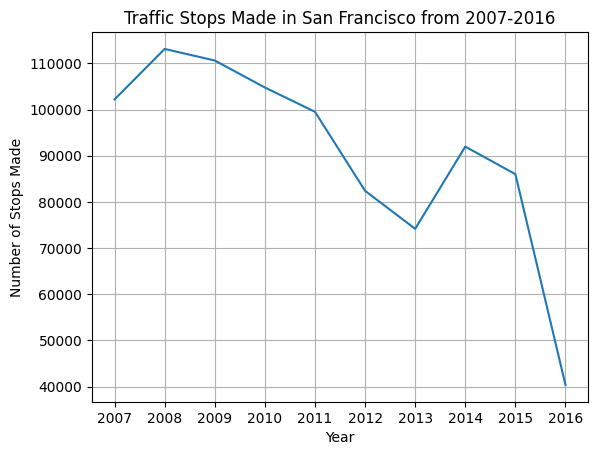

In [ ]:
x = stops_per_year.index
y = stops_per_year.values
plt.plot(x, y)
plt.xlabel("Year")
plt.ylabel("Number of Stops Made")
plt.title("Traffic Stops Made in San Francisco from 2007-2016")
plt.grid(True)
plt.xticks(np.arange(2007, 2017, 1))
plt.yticks(np.arange(40000, 120000, 10000))
plt.show()

The highest number of traffic stops recorded in San Francisco was 113,125 in 2008. Since then, the number of stops has generally declined over time. A notable exception occurred between 2013 and 2014, when there was a sharp increase in the number of traffic stops made but these numbers still remained below the levels seen between 2007 and 2011. From 2015 to 2016, there was a sharp decline in the number of traffic stops, with 2016 having lowest recorded number of traffic stops, at 40,348, of any year in the dataset.

In [ ]:
sex_counts = separate_dates['subject_sex'].value_counts()
sex_counts

,count
subject_sex,
male,639219
female,265851


Text(0.5, 1.0, 'Distribution of Traffic Stops by Sex')

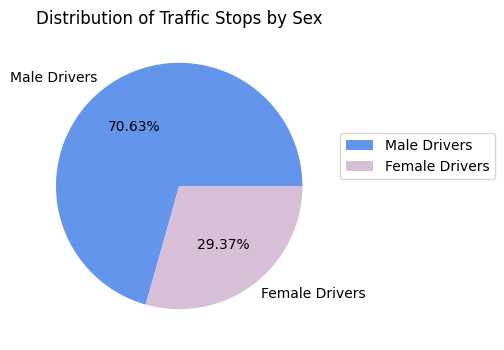

In [ ]:
num_male_drivers = sex_counts['male']
num_female_drivers = sex_counts['female']

plt.figure(figsize=(4, 4), dpi=100)

plt.pie([num_male_drivers, num_female_drivers], labels=['Male Drivers', 'Female Drivers'], colors=['cornflowerblue', 'thistle'], autopct='%1.2f%%')
plt.legend(loc='lower left', bbox_to_anchor=(1,0.5))
plt.title('Distribution of Traffic Stops by Sex')

The pie chart shows that most of the traffic stops in the dataset involve male drivers, which make up 70.63% of all drivers in the dataset.

In [ ]:
sex_counts['male']/(sex_counts['male'] + sex_counts['female'])*100

np.float64(70.62647088070536)

In [ ]:
stop_result_counts = separate_dates['raw_result_of_contact_description'].value_counts()
stop_result_counts

,count
raw_result_of_contact_description,
Citation,631276
Warning,245851
Incident Report,12360
In Custody Arrest,11851
No Further Action,3321
Citation|Warning,228
Citation|Incident Report,66
In Custody Arrest|Citation,40
Warning|Citation,21


In [ ]:
# calculate raw_result_of_contact_description by sex
subject_sex_result = separate_dates.groupby('subject_sex')['raw_result_of_contact_description'].value_counts()
subject_sex_result

# omit raw_result_of_contact_description data if its less than 1
subject_sex_result = subject_sex_result[subject_sex_result > 5]
subject_sex_result

subject_sex  raw_result_of_contact_description
female       Citation                             187585
             Warning                               72458
             In Custody Arrest                      2498
             Incident Report                        2430
             No Further Action                       758
             Citation|Warning                         68
             Citation|Incident Report                 19
             In Custody Arrest|Citation               10
             Warning|Citation                          8
male         Citation                             443691
             Warning                              173393
             Incident Report                        9930
             In Custody Arrest                      9353
             No Further Action                      2563
             Citation|Warning                        160
             Citation|Incident Report                 47
             In Custody Arrest|Citation               30
             Citation|In Custody Arrest               13
             Warning|Citation                         13
Name: count, dtype: int64

In [ ]:
# calculate subject_sex by raw_result_of_contact_description

# REBUILD
subject_result_sex = (
    separate_dates
    .groupby('raw_result_of_contact_description')['subject_sex']
    .value_counts()
)
subject_result_sex = subject_result_sex[subject_result_sex > 10]

# transform to a df
subject_result_sex = subject_result_sex.rename('count').reset_index()
subject_result_sex

,raw_result_of_contact_description,subject_sex,count
0,Citation,male,443691
1,Citation,female,187585
2,Citation|In Custody Arrest,male,13
3,Citation|Incident Report,male,47
4,Citation|Incident Report,female,19
5,Citation|Warning,male,160
6,Citation|Warning,female,68
7,In Custody Arrest,male,9353
8,In Custody Arrest,female,2498
9,In Custody Arrest|Citation,male,30


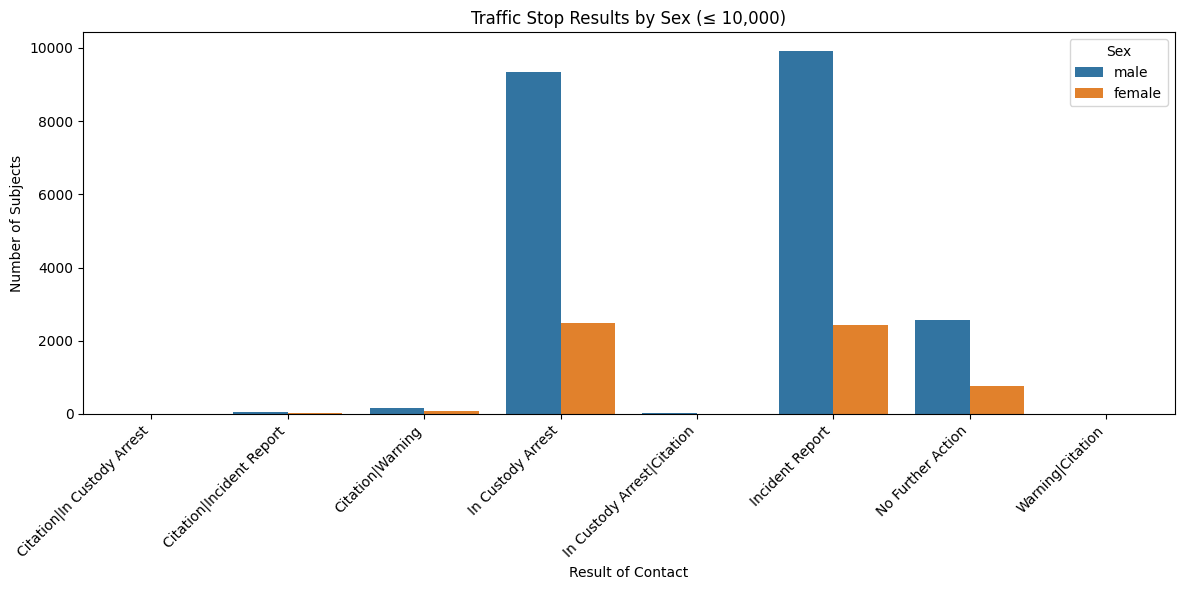

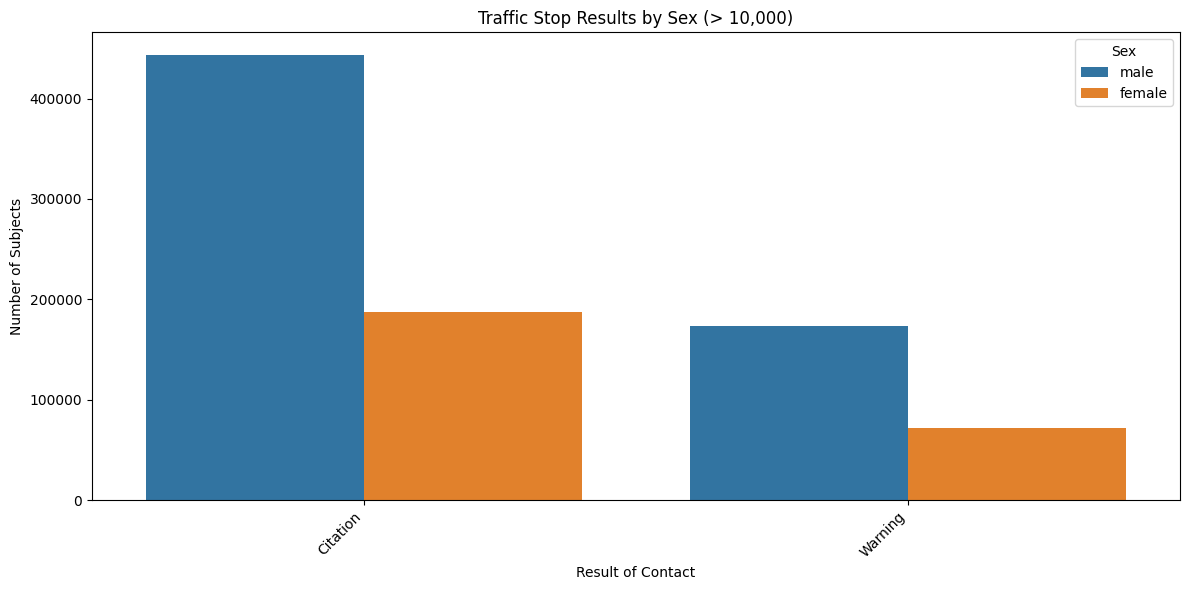

In [ ]:
# transform results from subject_sex_results into a graph
# broke apart to be able to see data more clearly

# split into two subsets
small_counts = subject_result_sex[subject_result_sex['count'] <= 10000]
large_counts = subject_result_sex[subject_result_sex['count'] > 10000]

# plot small counts
plt.figure(figsize=(12, 6))
sns.barplot(
    data=small_counts,
    x='raw_result_of_contact_description',
    y='count',
    hue='subject_sex'
)
plt.title('Traffic Stop Results by Sex (≤ 10,000)')
plt.xlabel('Result of Contact')
plt.ylabel('Number of Subjects')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Sex')
plt.show()


# plot large counts
plt.figure(figsize=(12, 6))
sns.barplot(
    data=large_counts,
    x='raw_result_of_contact_description',
    y='count',
    hue='subject_sex'
)
plt.title('Traffic Stop Results by Sex (> 10,000)')
plt.xlabel('Result of Contact')
plt.ylabel('Number of Subjects')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Sex')
plt.show()

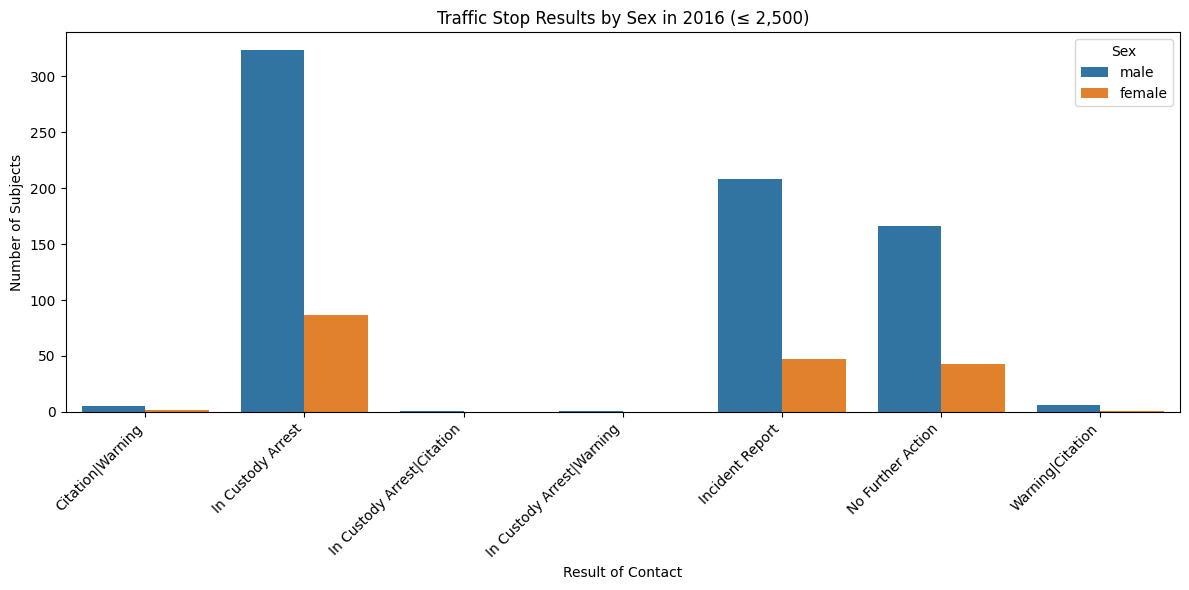

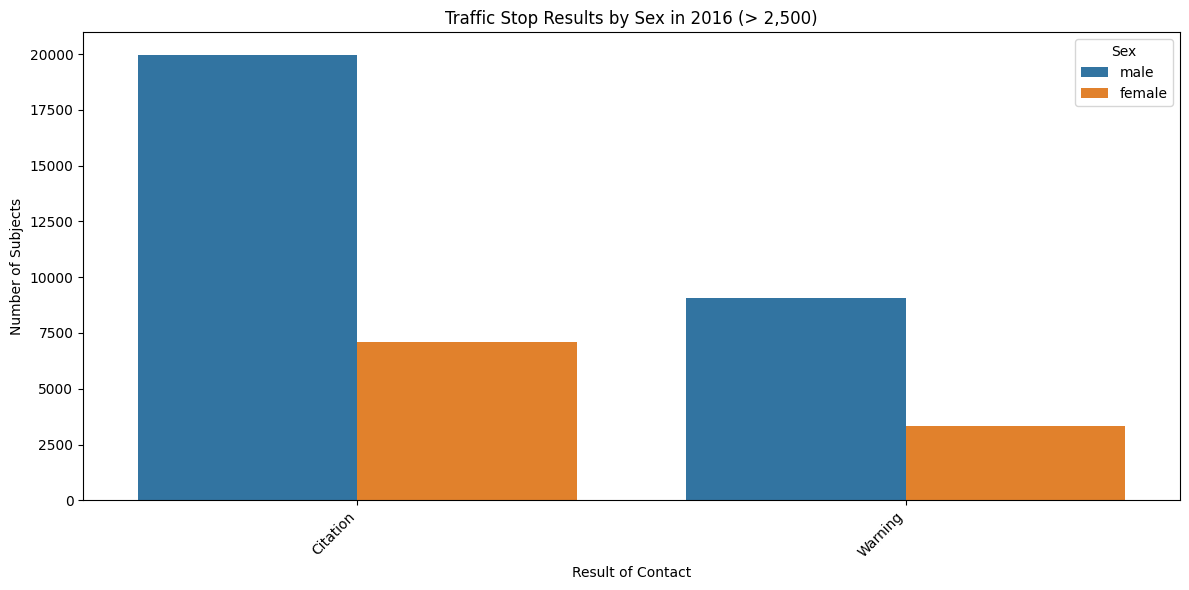

In [ ]:
# calculate same information but only in 2016
subject_result_sex_2016 = separate_dates[separate_dates['year'] == 2016].groupby('raw_result_of_contact_description')['subject_sex'].value_counts()
subject_result_sex_2016

# Convert to DataFrame for plotting
subject_result_sex_2016 = subject_result_sex_2016.rename('count').reset_index()
# split into two subsets
small_counts = subject_result_sex_2016[subject_result_sex_2016['count'] <= 2500]
large_counts = subject_result_sex_2016[subject_result_sex_2016['count'] > 2500]

# plot small counts
plt.figure(figsize=(12, 6))
sns.barplot(
    data=small_counts,
    x='raw_result_of_contact_description',
    y='count',
    hue='subject_sex'
)
plt.title('Traffic Stop Results by Sex in 2016 (≤ 2,500)')
plt.xlabel('Result of Contact')
plt.ylabel('Number of Subjects')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Sex')
plt.show()

# plot large counts
plt.figure(figsize=(12, 6))
sns.barplot(
    data=large_counts,
    x='raw_result_of_contact_description',
    y='count',
    hue='subject_sex'
)
plt.title('Traffic Stop Results by Sex in 2016 (> 2,500)')
plt.xlabel('Result of Contact')
plt.ylabel('Number of Subjects')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Sex')
plt.show()

##4. Question Formulation and Answering

__1. What are the five most common reasons for traffic stops and what are their typical outcomes?__

In [ ]:
stop_reason_counts = separate_dates['reason_for_stop'].value_counts()
stop_reason_counts.head(5)

,count
reason_for_stop,
Moving Violation,563105
Mechanical or Non-Moving Violation (V.C.),331477
MPC Violation,3542
Traffic Collision,1343
BOLO/APB/Warrant,1207


The top five most common reasons resulting in a traffic stop in San Francisco are
1. Moving Violation
2. Mechanical or Non-Moving Violation (V.C.)
3. MPC Violation
4. Traffic Collision
5. BOLO/APB/Warrant

Moving Violation
outcome
citation    412547
warning     137611
clear         6524
arrest        6423
Name: count, dtype: int64

Mechanical or Non-Moving Violation (V.C.)
outcome
citation    215635
warning     105129
clear         6230
arrest        4483
Name: count, dtype: int64

MPC Violation
outcome
citation    1630
warning     1209
clear        638
arrest        65
Name: count, dtype: int64

Traffic Collision
outcome
citation    698
clear       489
arrest      126
warning      30
Name: count, dtype: int64

BOLO/APB/Warrant
outcome
clear       580
warning     277
arrest      275
citation     75
Name: count, dtype: int64



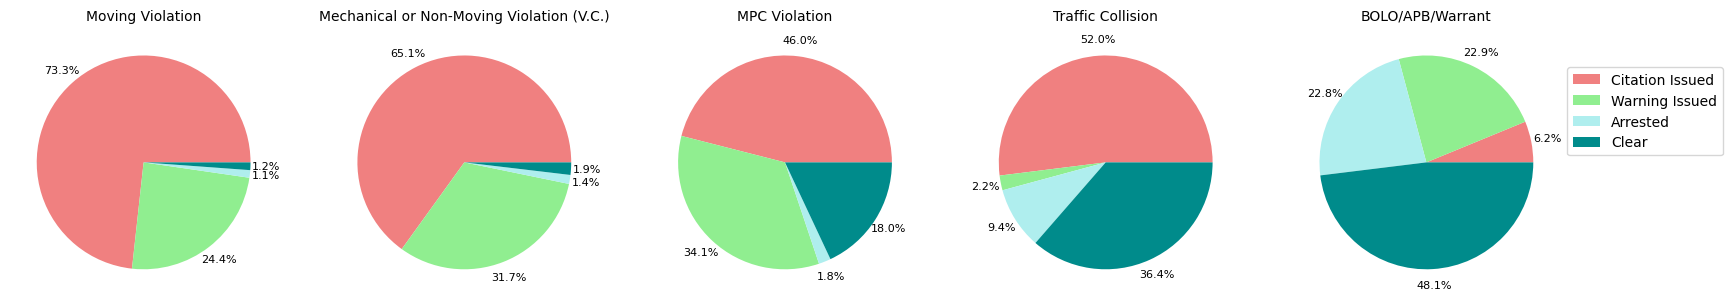

In [ ]:
#Extracts the top five most common reasons leading to a traffic stop.
stop_reasons = [reason for reason in stop_reason_counts.index[0:5]]
stop_reasons

outcome_labels = np.array(['Citation Issued', 'Warning Issued', 'Arrested', 'Clear'])
color_labels = np.array(['lightcoral', 'lightgreen', 'paleturquoise', 'darkcyan'])

i = 0

#Sets up the subplot grid — 1 row, 5 columns
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5), dpi=100)

for reason in stop_reasons:
  outcome_counts = separate_dates[separate_dates['reason_for_stop'] == reason]['outcome'].value_counts()
  print(reason)
  print(outcome_counts, end='\n\n')

  citation_issued = outcome_counts['citation']    #Retrieves the number of times a citation was issued following a traffic stop.
  warning_issued = outcome_counts['warning']      #Retrieves the number of times a warning was issued following a traffic stop.
  arrested = outcome_counts['arrest']             #Retrieves the number of times a subject was arrested following a traffic stop.
  clear = outcome_counts['clear']                 #Retrieves the number of times a subject was not arrested or issued a citation or warning following a traffic stop.


  axs[i].pie([citation_issued, warning_issued, arrested, clear], colors=color_labels, autopct='%1.1f%%', textprops={'fontsize': 8}, pctdistance=1.15)
  axs[i].set_title(reason, fontsize=10)

  i += 1

plt.legend(loc='lower left', labels=outcome_labels, bbox_to_anchor=(1,0.5))
plt.show()

*Citation Issued* accounted for a majority of outcomes for *Moving Violation*, *Mechanical or Non-Moving Violation*, and *Traffic Collision* ; and a plurality of outcomes for *MPC Violation*. Notably, *Citation Issued* was the least common outcome (6.2%) for *BOLO/APB/Warrant*.

*Warning Issued* was the second most common outcome for the top five reasons leading to a traffic stop, except for *Traffic Collision* where it was the least common outcome.

*Arrested* was the least common or second least common outcome, accounting for less than 10% of outcomes for the top five reasons leading to a traffic stop, except for *BOLO/APB/Warrant* where *Arrested* (22.8%) accounted for nearly the same proportion of outcomes as *Warning Issued* (22.9%).

*Clear* accounted for a plurality (48.1%) of outcomes for *BOLO/APB/Warrant*, indicating that drivers that subjects  for *BOLO/APB/Warrant* were the most likely to not arrested or issued a warning or citation compared to the other four reasons. *Clear* was also the second most common outcome (36.4%) of traffic stops due to *Traffic Collision*.

__2. Which 5 days of the month had the highest number of arrests made?__

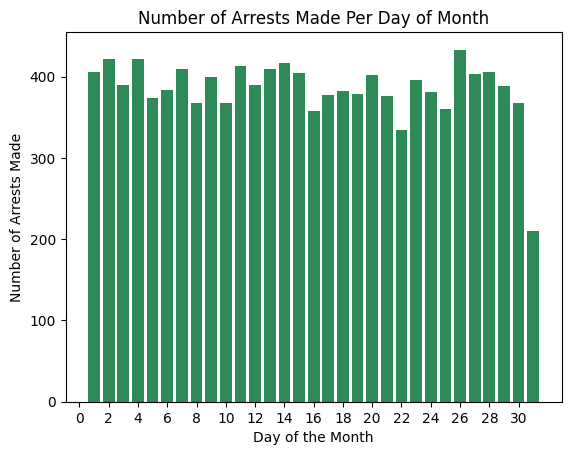

,arrest_count
day,
26,433
4,422
2,422
14,417
11,413


In [ ]:
month_grouped = separate_dates.groupby('day')

#Retrieves the counts of each traffic stop outcome ('citation_issued, 'warning_issued', 'arrest_made', 'clear')
arrests_per_month_day = month_grouped['outcome'].value_counts()

#Retrieves the index at level 0 in the multi-index.
days = arrests_per_month_day.index.get_level_values(0)
days = days.unique()    #Extracts all unique day values (There are four duplicates of each day number)

#Extacts just the count for the number of arrests per day of the month.
arrest_count = np.array(arrests_per_month_day.xs('arrest', level='outcome'))

plt.bar(days, arrest_count, color='seagreen')
plt.ylabel('Number of Arrests Made')
plt.xlabel('Day of the Month')
plt.xticks(np.arange(0, 32, 2))
plt.title('Number of Arrests Made Per Day of Month')
plt.show()

arrests_per_month_day = pd.Series(arrest_count, index=days)
arrests_per_month_day.name = 'arrest_count'

#Sorts the series in descending order and retrieves the top 5 days of the month with the most citations issued.
arrests_per_month_day.sort_values(ascending=False).head(5)

The histogram shows a uniform distribution for the number of arrests made per day of month from 2007 to 2016 in San Francisco, CA. The days of the month that saw the highest number of arrests made, in descending order, are the 26th, 4th, 2nd, 14th, and 11th, each with over 410 arrests. The 31st saw the fewest number of arrests by a notable margin, likely because only a handful of months have a 31st day.

__3. Which season sees the most arrests made in San Francisco?__

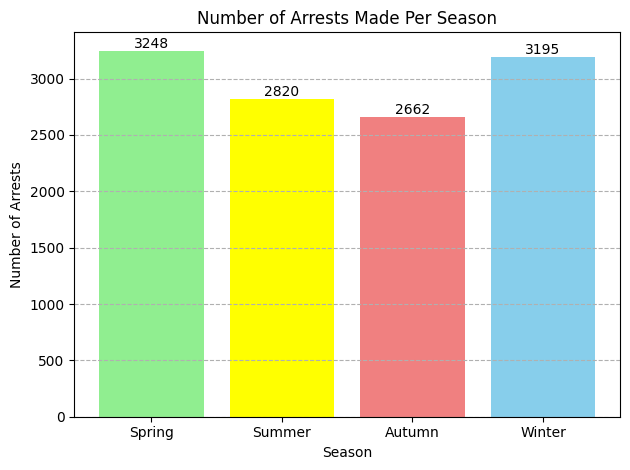

In [ ]:
spring_mask = (separate_dates['date'].dt.month >= 3) & (separate_dates['date'].dt.month <= 5)
summer_mask = (separate_dates['date'].dt.month >= 6) & (separate_dates['date'].dt.month <= 8)
autumn_mask = (separate_dates['date'].dt.month >= 9) & (separate_dates['date'].dt.month <= 11)
winter_mask = (separate_dates['date'].dt.month == 12) | (separate_dates['date'].dt.month <= 2)

spring_df = separate_dates[spring_mask]
summer_df = separate_dates[summer_mask]
autumn_df = separate_dates[autumn_mask]
winter_df = separate_dates[winter_mask]

spring_arrest_count = spring_df['outcome'].value_counts()['arrest']
summer_arrest_count = summer_df['outcome'].value_counts()['arrest']
autumn_arrest_count = autumn_df['outcome'].value_counts()['arrest']
winter_arrest_count = winter_df['outcome'].value_counts()['arrest']

seasons = np.array(['Spring', 'Summer', 'Autumn', 'Winter'])
arrest_count_by_season = np.array([spring_arrest_count, summer_arrest_count, autumn_arrest_count, winter_arrest_count])


color_labels = np.array(['lightgreen', 'yellow', 'lightcoral', 'skyblue'])

bars = plt.bar(seasons, arrest_count_by_season, color=color_labels)
plt.title("Number of Arrests Made Per Season")
plt.xlabel("Season")
plt.ylabel("Number of Arrests")
plt.grid(axis="y", linestyle="--")
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    plt.text(x, height, f'{height:.0f}', ha='center', va='bottom')

plt.show()

From 2007 to 2016, the highest number of arrests was recorded during the spring, at 3,248. The second-highest number of arrests was recorded during winter, at 3,195. These were the only two seasons with over 3,000 arrests during the period. Summer accounted for the third-highest number of arrests at 2,820, while autumn saw the fewest arrests, with a total of 2,662.

__4. What times during the day are arrests the most frequent?__

In [ ]:
time_grouped = separate_dates.groupby('time')

#Retrieves the counts of each traffic stop outcome ('citation_issued, 'warning_issued', 'arrest_made', 'clear')
arrests_by_time = time_grouped['outcome'].value_counts()

arrests_by_time.dropna(inplace=True)

#Retrieves the index at level 0 in the multi-index.
times = arrests_by_time.index.get_level_values(0)
times = times.unique()    #Extracts all unique time values

#Extacts just the count for the number of arrests by time.
arrest_counts = arrests_by_time.xs('arrest', level='outcome')

arrest_counts = arrest_counts.reindex(times, fill_value=0).values

arrests_by_time = pd.Series(arrest_counts, index=times)
arrests_by_time.name = 'arrest_count'
arrests_by_time.sort_values(ascending=False).head(10)

,arrest_count
time,
23:00:00,110
18:00:00,92
17:00:00,86
19:00:00,83
23:30:00,83
22:00:00,72
20:00:00,72
22:30:00,68
22:50:00,66


In San Francisco, from 2007 to 2016 the 10 time periods with the highest number of arrests occurred during the late afternoon to evening hours. The highest number of arrests happened at 11:00 PM (23:00), with a total of 110 arrests. These results could suggest that arrests were more frequent during the later part of the day.

__5. Are drivers that were searched during traffic stops subject to arrests at higher rates than drivers that were not searched?__

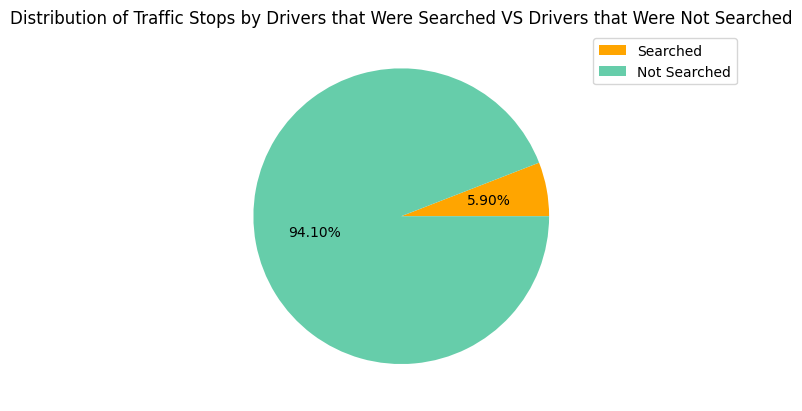

Was Searched
outcome
citation    23813
warning     13524
clear        8846
arrest       7198
Name: count, dtype: int64

Was Not Searched
outcome
citation    607789
warning     232338
clear         6835
arrest        4727
Name: count, dtype: int64


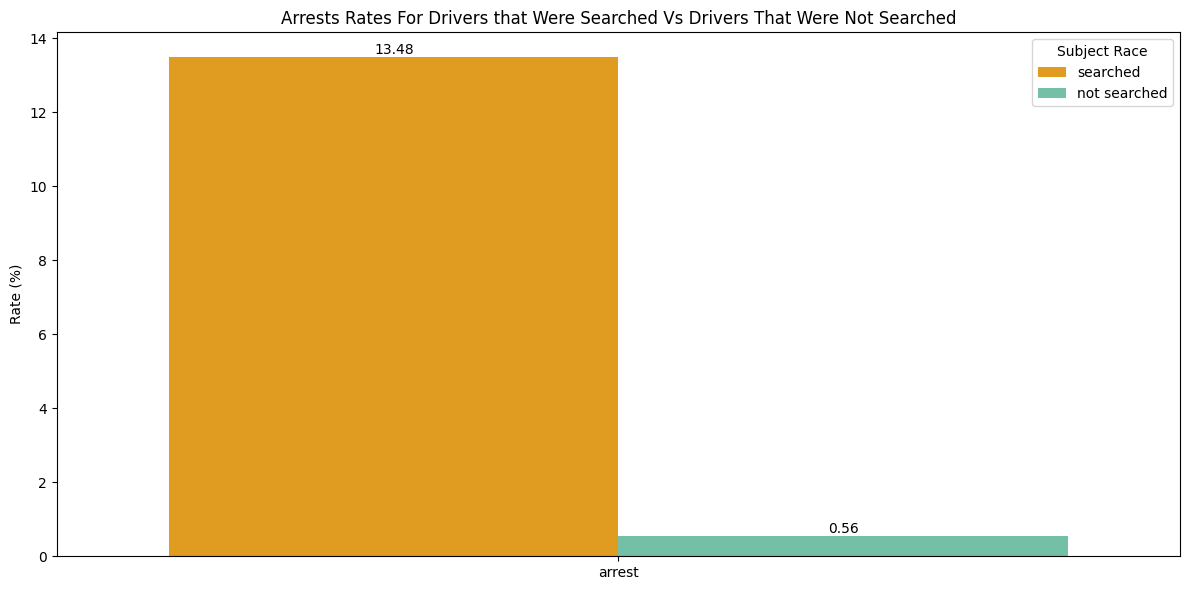

In [ ]:
search_conducted = separate_dates['search_conducted'].value_counts()

searched_count = search_conducted[True]                                         #Retrieves the number of drivers in the dataset that were searched during a traffic stop.
not_searched_count = search_conducted[False]                                    #Retrieves the number of drivers in the dataset that were not searched during a traffic stop,

search_labels = np.array(['Searched', 'Not Searched'])
color_labels = np.array(['orange', 'mediumaquamarine'])

#Creates a pie chart that displays the proportion of drivers in the dataset that were searched and drivers
#that were not searched during a traffic stop.
plt.pie(np.array([searched_count, not_searched_count]), colors=color_labels, autopct='%1.2f%%')
plt.legend(labels=search_labels, bbox_to_anchor=(1.0, 1.0))
plt.title('Distribution of Traffic Stops by Drivers that Were Searched VS Drivers that Were Not Searched')
plt.show()

####################################################### Calculating Arrest and Search Rates for Drivers that Were Searched #######################################################
mask1 = separate_dates['search_conducted'] == True
searched_df = separate_dates[mask1]                                             #Filters out rows from the dataframe where a subject was searched during a traffic stop.

print("Was Searched")
print(searched_df['outcome'].value_counts(), end='\n\n')

arrest_count_searched = searched_df['outcome'].value_counts()['arrest']         #Retrieves the number of drivers were searched and was arrested during a traffic stop.
searched_arrest_rate = arrest_count_searched / searched_count * 100             #Calculates the rate at which drivers that were searched were arrested following a traffic stop.

##################################################### Calculating Arrest and Search Rates for Drivers that Were Not Searched #####################################################

mask2 = separate_dates['search_conducted'] == False
not_searched_df = separate_dates[mask2]                                         #Filters out rows from the dataframe where a subject was not searched during a traffic stop.

print("Was Not Searched")
print(not_searched_df['outcome'].value_counts())

arrest_count_not_searched = not_searched_df['outcome'].value_counts()['arrest'] #Retrieves the number of drivers were not searched but was arrested during a traffic stop.
not_searched_arrest_rate = arrest_count_not_searched / not_searched_count * 100 #Calculates the rate at which drivers that were not searched were arrested following a traffic stop.

############################################################################# Displaying Arrest Rates #############################################################################
arrest_rates = {'arrest': np.array(['arrest', 'arrest']),
                'search_conducted': np.array(['searched', 'not searched']),
                'rate': np.array([searched_arrest_rate, not_searched_arrest_rate])}

plt.figure(figsize=(12, 6))

ax = sns.barplot(
      data=arrest_rates,
      x='arrest',
      y='rate',
      hue='search_conducted',
      palette=color_labels)

#Displays the value of each bin in the barplot.
for container in ax.containers:
  ax.bar_label(container, fmt='%.2f')

plt.title('Arrests Rates For Drivers that Were Searched Vs Drivers That Were Not Searched')
plt.xlabel(None)
plt.ylabel('Rate (%)')
plt.xticks(ha='center')
plt.tight_layout()
plt.legend(title='Subject Race')
plt.show()

The bar plot shows that in San Francisco drivers who were searched during traffic stops were arrested at a significantly higher rate (13.48%) compared to those who were not searched (0.56%). It should be noted that only about 5.90% of drivers in the dataset were searched during a traffic stop, which amounts to 53,381 subjects. For both groups, arrest was the least common outcome.

__6. Are non-white drivers subject to citations, warnings, arrests, or searches at higher rates than white drivers?__

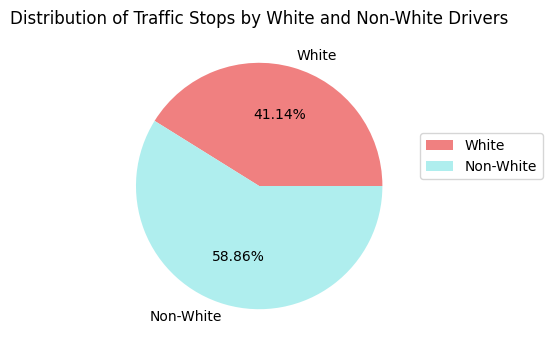

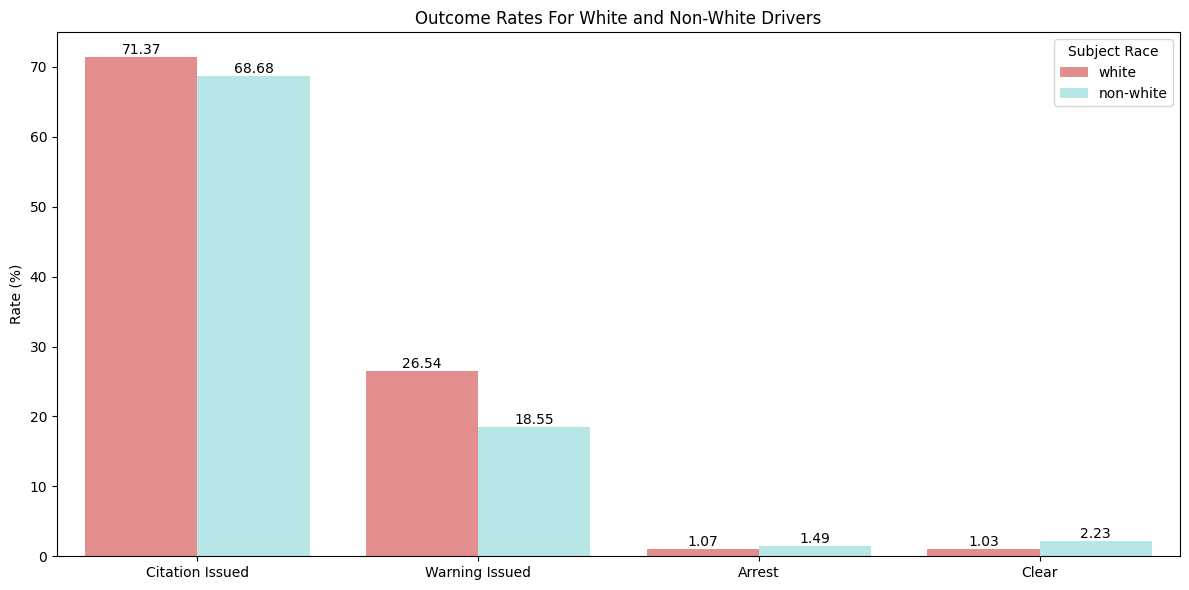

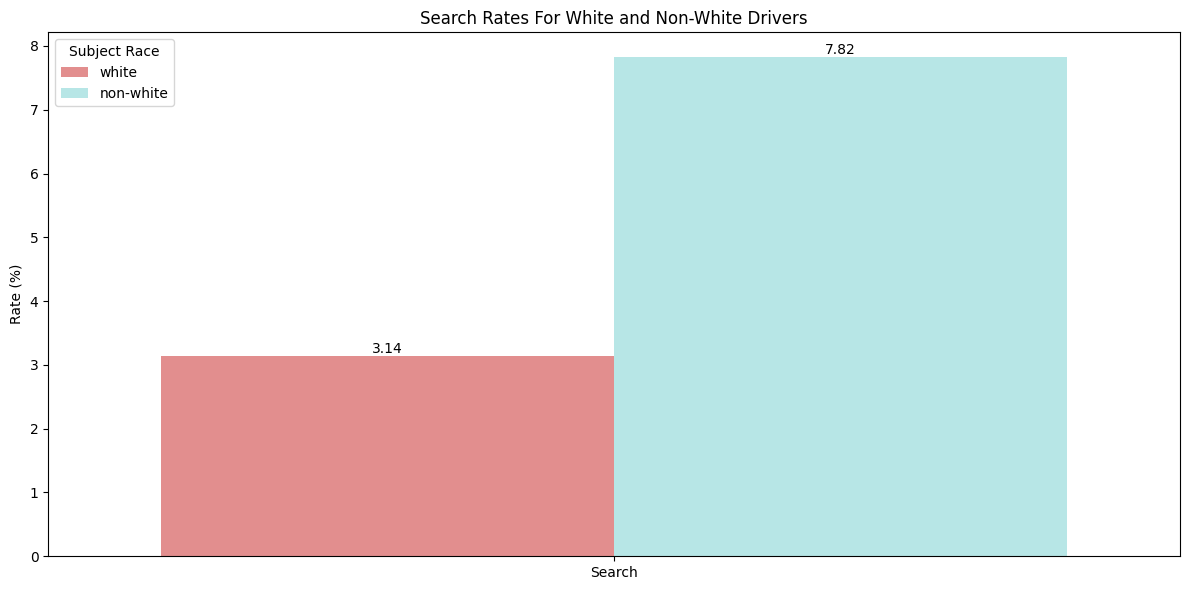

In [ ]:
race_counts = separate_dates['subject_race'].value_counts()

#Retrieves the number of white drivers in the dataset.
num_white_drivers = race_counts['white']

#Retrieves the number of non-white drivers in the dataset.
num_non_white_drivers = race_counts['asian/pacific islander'] + race_counts['black'] + race_counts['hispanic'] + race_counts['other']

plt.figure(figsize=(4, 4), dpi=100)

race_labels = np.array(['White', 'Non-White'])
color_labels = np.array(['lightcoral', 'paleturquoise'])

#Creates a pie chart that displays the proportion of white and non-white drivers in the dataset.
plt.pie([num_white_drivers, num_non_white_drivers], labels=race_labels, colors=color_labels, autopct='%1.2f%%')
plt.legend(loc='lower left', bbox_to_anchor=(1,0.5))
plt.title('Distribution of Traffic Stops by White and Non-White Drivers')
plt.show()

############################################################### Calculating Outcome and Search Rates for White Drivers #############################################################
mask1 = separate_dates['subject_race'] == 'white'
white_df = separate_dates[mask1]      #Filters out rows from the dataframe where the subject's race is identified as 'white'

citation_count_white = white_df['outcome'].value_counts()['citation']           #Retrieves the number of white drivers that were issued a citation following a traffic stop.
warning_count_white = white_df['outcome'].value_counts()['warning']             #Retrieves the number of white drivers that were issued a warning following a traffic stop.
arrest_count_white = white_df['outcome'].value_counts()['arrest']               #Retrieves the number of white drivers that were arrested following a traffic stop.
clear_count_white = white_df['outcome'].value_counts()['clear']                 #Retrieves the number of white drivers that were not arrested or issued a citation or warning or
                                                                                #following a traffic stop.

search_count_white = white_df['search_conducted'].value_counts()[True]          #Retrieves the number of white drivers that were sea#rched.

white_citation_rate = citation_count_white / num_white_drivers                  #Calculates the rate at which white drivers that were issued a citation following a traffic stop.
white_warning_rate = warning_count_white / num_white_drivers                    #Calculates the rate at white drivers  that were issued a warning following a traffic stop.
white_arrest_rate = arrest_count_white / num_white_drivers                      #Calculates the rate at white drivers that were arrested following a traffic stop.
white_clear_rate = clear_count_white / num_white_drivers                        #Calculates the rate at which white drivers were not arrested or issued a citation or warning.
                                                                                #following a traffic stop.


white_search_rate = search_count_white / num_white_drivers                      #Calculates the rate at which white drivers that were searched following a traffic stop.

############################################################ Calculating Outcome and Search Rates for Non-White Drivers ############################################################
mask2 = separate_dates['subject_race'] != 'white'
non_white_df = separate_dates[mask2]  #Filters out rows from the dataframe where the subject's is not identified as 'white'

citation_count_non_white = non_white_df['outcome'].value_counts()['citation']   #Retrieves the number of non-white drivers that were issued a citation following a traffic stop.
warning_count_non_white = non_white_df['outcome'].value_counts()['warning']     #Retrieves the number of non-white drivers that were issued a warning following a traffic stop.
arrest_count_non_white = non_white_df['outcome'].value_counts()['arrest']       #Retrieves the number of non-white drivers that were arrested following a traffic stop.
clear_count_non_white = non_white_df['outcome'].value_counts()['clear']         #Retrieves the number of non-white drivers that were not arrested or issued a citation or warning
                                                                                #following a traffic stop.

search_count_non_white = non_white_df['search_conducted'].value_counts()[True]  #Retrieves the number of non-white drivers that were searched.

non_white_citation_rate = citation_count_non_white / num_non_white_drivers      #Calculates the rate at which non-white drivers that were issued a citation following a traffic stop.
non_white_warning_rate = warning_count_white / num_non_white_drivers            #Calculates the rate at which non-white drivers that were issued a warning following a traffic stop.
non_white_arrest_rate = arrest_count_non_white / num_non_white_drivers          #Calculates the rate at which non-white drivers that were arrested following a traffic stop.
non_white_clear_rate = clear_count_non_white / num_non_white_drivers            #Calculates the rate at which non-white drivers that were searched following a traffic stop.

non_white_search_rate = search_count_non_white / num_non_white_drivers          #Calculates the rate at which non-white drivers that were searched following a traffic stop.
print()
############################################################################# Displaying Outcome Rates #############################################################################
outcome_rates = {
    'outcome': np.array(['Citation Issued', 'Citation Issued', 'Warning Issued', 'Warning Issued', 'Arrest', 'Arrest', 'Clear', 'Clear']),
    'subject_race': np.array(['white', 'non-white', 'white', 'non-white', 'white', 'non-white', 'white', 'non-white']),
    'rate': np.array([ white_citation_rate * 100, non_white_citation_rate * 100,
              white_warning_rate * 100, non_white_warning_rate * 100,
              white_arrest_rate * 100, non_white_arrest_rate * 100,
              white_clear_rate * 100, non_white_clear_rate * 100])
}

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=outcome_rates,
    x='outcome',
    y='rate',
    hue='subject_race',
    palette=color_labels
)

#Displays the value of each bin in the barplot
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
############################################################################# Displaying Search Rates #############################################################################
search_rates = {
    'search': np.array(['Search', 'Search']),
    'subject_race': np.array(['white', 'non-white']),
    'rate': np.array([white_search_rate * 100, non_white_search_rate * 100])
}
plt.title('Outcome Rates For White and Non-White Drivers')
plt.xlabel(None)
plt.ylabel('Rate (%)')
plt.xticks(ha='center')
plt.tight_layout()
plt.legend(title='Subject Race')
plt.show()

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=search_rates,
    x='search',
    y='rate',
    hue='subject_race',
    palette=color_labels
)


print()
#Displays the value of each bin in the barplot
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Search Rates For White and Non-White Drivers')
plt.xlabel(None)
plt.ylabel('Rate (%)')
plt.xticks(ha='center')
plt.tight_layout()
plt.legend(title='Subject Race')
plt.show()

In [ ]:
race_counts = separate_dates['subject_race'].value_counts()
race_counts

,count
subject_race,
white,372318
asian/pacific islander,157684
black,152196
hispanic,116014
other,106858


For this question we should refer back to the Census demographics. These are from 2020, whether we should stick to analyzing 2010s records from the 2006-2016 year range, and rely on 2010 Census data only is a fair question, but for now we will look at more recent data.

White alone, 50.8%<br>
Black alone, 5.7%<br>
American Indian and Alaska Native alone, 0.8%<br>
Asian alone, 37.2%<br>
Native Hawaiian and Other Pacific Islander alone, 0.5%<br>
Two or More Races, 5.0%<br>
Hispanic or Latino, 16.4%<br>
White alone, not Hispanic or Latino, 37.5%<br>

It's difficult to come to concrete conclusions without knowing how the San Francisco police department itself classifies, mixed people, white hispanics and the like. White people were more or less stopped at rates representative of their population (if you assume the 37% demographic expected for non-hispanic whites). With that said, we can see that as a percentage (%) white people were more likely to get away with a warning, less likely to have a search conducted, and arrested at rates lower than non-whites. I imagine these rates are also starkly different between each included race categorization. As even a quick value counts analysis of the race representation in the dataset shows that Black people were 16% of the dataset, but only 5-6% of the actual San Francisco population, Asians make up 37% of the population but are only 17% of traffic stops, with Hispanic and the *other* categories falling around 12% each.

__7. Are younger drivers in the dataset searched and arrested at higher rates than older drivers?__

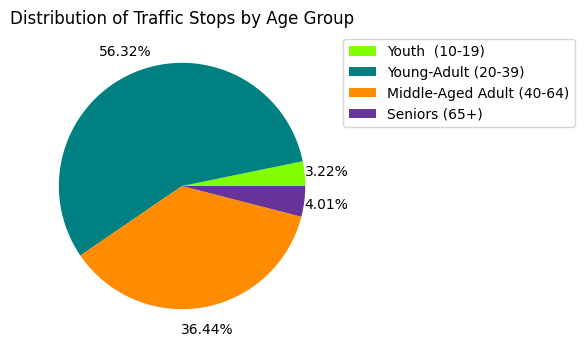

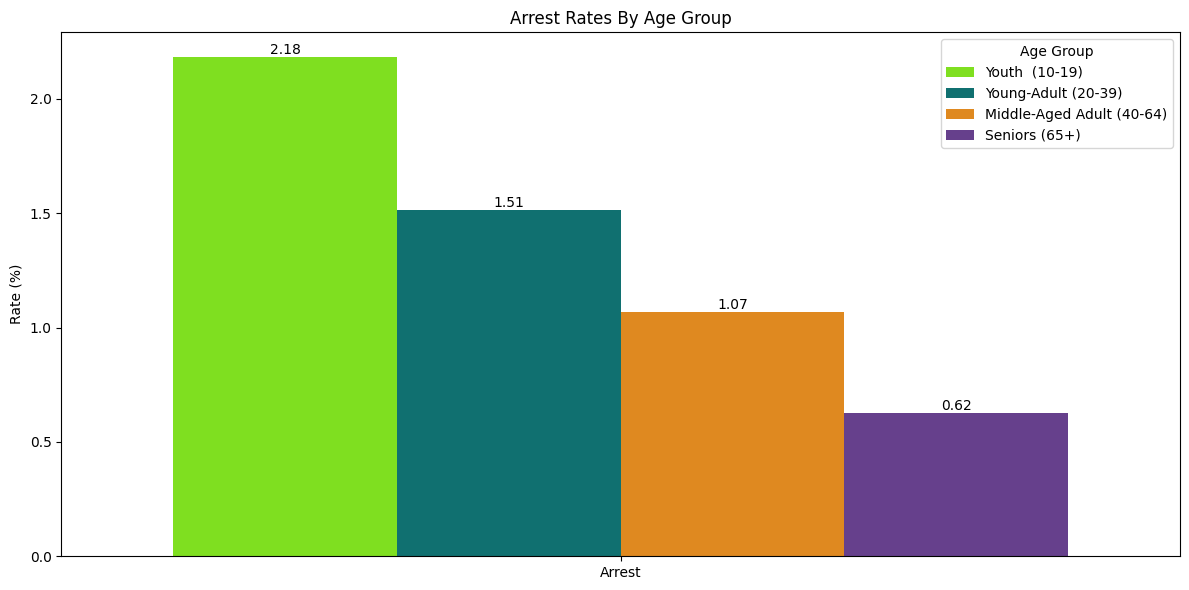

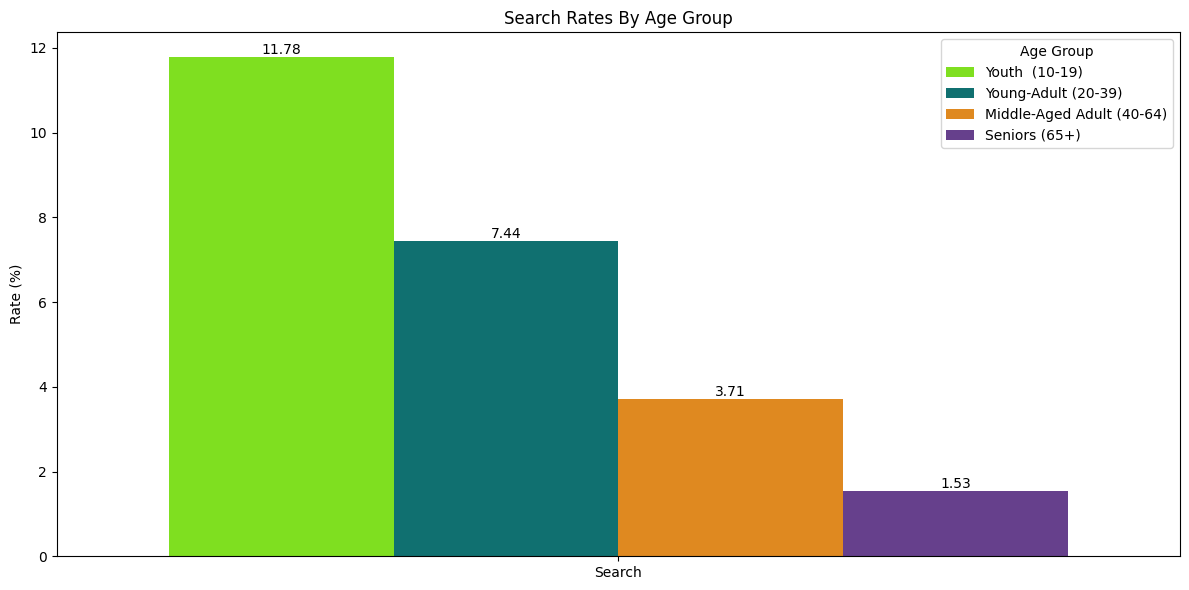

In [ ]:
youth_mask = separate_dates['subject_age'] < 20
young_adult_mask = (separate_dates['subject_age'] >= 20) & (separate_dates['subject_age'] < 40)
middle_adult_mask = (separate_dates['subject_age'] >= 40) & (separate_dates['subject_age'] < 65)
senior_mask = separate_dates['subject_age'] >= 65

num_youths = len(separate_dates[youth_mask])                                    #Retrieves the number of drivers in the dataset aged 19 or younger.
num_young_adults = len(separate_dates[young_adult_mask])                        #Retrieves the number of drivers in the dataset from ages 20 to 39.
num_middle_aged_adults = len(separate_dates[middle_adult_mask])                 #Retrieves the number of drivers in the dataset from ages 40 to 64.
num_seniors = len(separate_dates[senior_mask])                                  #Retrieves the number of drivers in the dataset that are 65 or older.

########################################################## Calculating Arrest and Search Rates for Drivers Aged 19 or Younger ##########################################################
youth_df = separate_dates[youth_mask]                                           #Filters out rows from the dataframe where a subject is aged 19 or younger.
arrest_count_youth = youth_df['outcome'].value_counts()['arrest']
youth_arrest_rate = arrest_count_youth / num_youths                             #Calculates the rate at which drivers aged 19 or younger that were arrested following a traffic stop.

search_count_youth = youth_df['search_conducted'].value_counts()[True]
youth_search_rate = search_count_youth / num_youths                             #Calculates the rate at which drivers aged 19 or younger that were searched during a traffic stop.

############################################################## Calculating Arrest and Search Rates for Drivers Aged 20-39 #############################################################
young_adult_df = separate_dates[young_adult_mask]                               #Filters out rows from the dataframe where a subject is aged 20-39.
arrest_count_young_adults = young_adult_df['outcome'].value_counts()['arrest']
young_adult_arrest_rate = arrest_count_young_adults / num_young_adults          #Calculates the rate at which drivers aged 20-39 that were arrested following a traffic stop.

search_count_young_adults = young_adult_df['search_conducted'].value_counts()[True]
young_adult_search_rate = search_count_young_adults / num_young_adults          #Calculates the rate at which drivers aged 20-39 that were searched during a traffic stop.

############################################################## Calculating Arrest and Search Rates for Drivers Aged 40-64 ############################################################
middle_adult_df = separate_dates[middle_adult_mask]                             #Filters out rows from the dataframe where a subject is aged 40-64.
arrest_count_middle_adults = middle_adult_df['outcome'].value_counts()['arrest']
middle_adult_arrest_rate = arrest_count_middle_adults / num_middle_aged_adults  #Calculates the rate at which drivers aged 40-64 that were arrested during a traffic stop.

search_count_middle_adults = middle_adult_df['search_conducted'].value_counts()[True]
middle_adult_search_rate = search_count_middle_adults / num_middle_aged_adults  #Calculates the rate at which drivers aged 40-64 that were searched during a traffic stop.

########################################################### Calculating Arrest and Search Rates for Drivers Aged 65 or Older #########################################################
senior_df = separate_dates[senior_mask]                                         #Filters out rows from the dataframe where a subject is aged 65 or older.
arrest_count_seniors = senior_df['outcome'].value_counts()['arrest']
senior_arrest_rate = arrest_count_seniors / num_seniors                         #Calculates the rate at which drivers aged 65 or older that were arrested during a traffic stop.

search_count_seniors = senior_df['search_conducted'].value_counts()[True]
senior_search_rate = search_count_seniors / num_seniors                         #Calculates the rate at which drivers aged 65 or older that were searched during a traffic stop.


############################################################ Displaying Composition of Drivers in the Dataset By Age Group ###########################################################
plt.figure(figsize=(4, 4), dpi=100)

age_group_labels = np.array(['Youth  (10-19)', 'Young-Adult (20-39)', 'Middle-Aged Adult (40-64)', 'Seniors (65+)'])
color_labels = np.array(['chartreuse', 'teal', 'darkorange', 'rebeccapurple'])

#Creates and displays a pie chart showing the composition of drivers by age group.
plt.pie([num_youths, num_young_adults, num_middle_aged_adults, num_seniors], colors=color_labels, autopct='%1.2f%%', pctdistance=1.18)
plt.legend(labels=age_group_labels, bbox_to_anchor=(1.0, 1.0))
plt.title('Distribution of Traffic Stops by Age Group')
plt.show()

print()
############################################################################## Displaying Arrest Rates ##############################################################################
arrest_rates = {
    'outcome': ['Arrest'] * 4,
    'age_group': age_group_labels,
    'rate': np.array([youth_arrest_rate * 100,
             young_adult_arrest_rate * 100,
             middle_adult_arrest_rate * 100,
             senior_arrest_rate * 100])
}

plt.figure(figsize=(12, 6))

#Creates and displays a barplot showing the arrest rates for each age group.
ax = sns.barplot(
    data=arrest_rates,
    x='outcome',
    y='rate',
    hue='age_group',
    palette=color_labels
)

#Displays the value of each bin in the barplot
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Arrest Rates By Age Group')
plt.xlabel(None)
plt.ylabel('Rate (%)')
plt.xticks(ha='center')
plt.tight_layout()
plt.legend(title='Age Group')
plt.show()

print()
############################################################################# Displaying Search Rates #############################################################################
search_rates = {
    'search_conducted': ['Search'] * 4,
    'age_group': age_group_labels,
    'rate': np.array([youth_search_rate * 100,
             young_adult_search_rate * 100,
             middle_adult_search_rate * 100,
             senior_search_rate * 100])
}

plt.figure(figsize=(12, 6))

#Creates and displays a barplot showing the search rates for each age group.
ax = sns.barplot(
    data=search_rates,
    x='search_conducted',
    y='rate',
    hue='age_group',
    palette=color_labels
)

#Displays the value of each bin in the barplot
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Search Rates By Age Group')
plt.xlabel(None)
plt.ylabel('Rate (%)')
plt.xticks(ha='center')
plt.tight_layout()
plt.legend(title='Age Group')
plt.show()

The distribution of age ranges in the data from San Francisco indicates that young people are by and large stopped by police more often than other age groups. To see if this is due to differences in the driving population or their actual driving we then looked at arrest and search rates by age range. And it's fairly conclusive to see that for both arrests and searches younger driver were opverwhelmingly more liekly for both when compared to middle aged and senior drivers. The jump in arrest rates from middle aged to young adult being a 50% increase relative to one another, and almost a 100% increase when it came to search rates.

__8. Are male drivers subject to citations, warnings, arrests, or searches at higher rates than female drivers?__


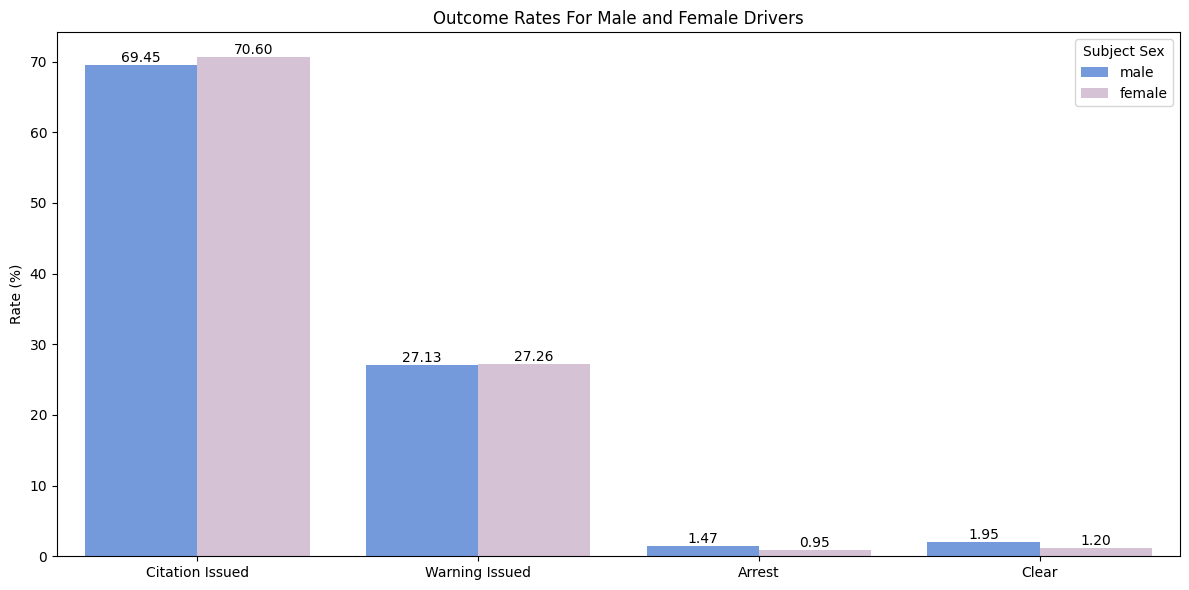

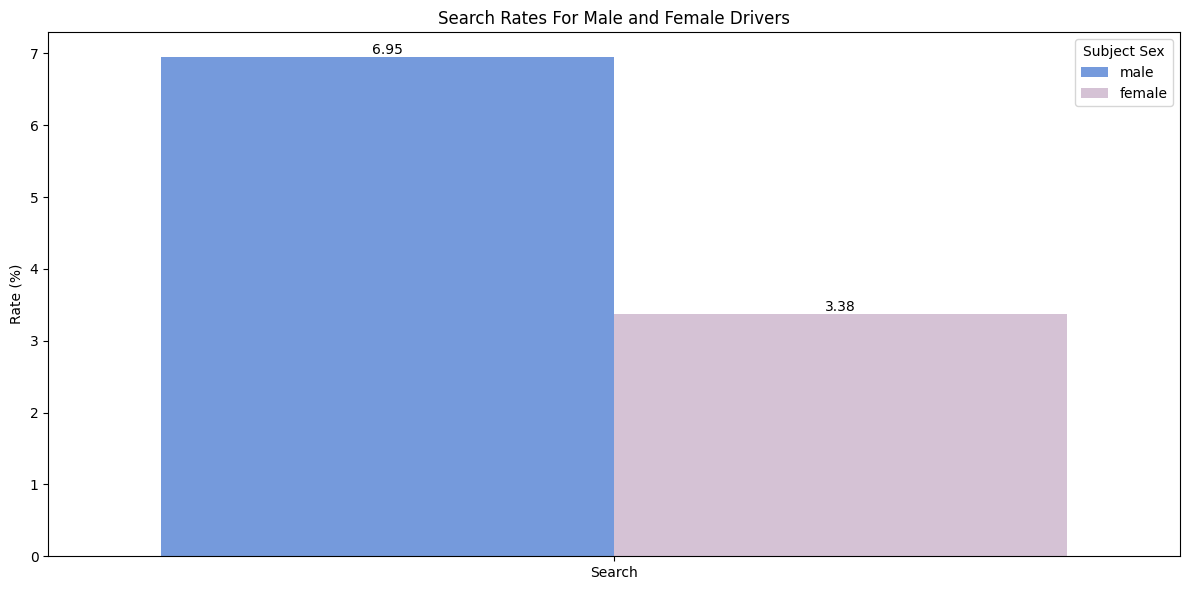

In [ ]:
sex_counts = separate_dates['subject_sex'].value_counts()

num_male_drivers = sex_counts['male']                                           #Retrieves the number of male drivers in the dataset.
num_female_drivers = sex_counts['female']                                       #Retrieves the number of female drivers in the dataset.

############################################################### Calculating Outcome and Search Rates for Male Drivers ###############################################################
mask1 = separate_dates['subject_sex'] == 'male'
male_df = separate_dates[mask1]      #Filters out rows from the dataframe where the subject's sex is identified as 'male'

citation_count_male = male_df['outcome'].value_counts()['citation']             #Retrieves the number of male drivers that were issued a citation following a traffic stop.
warning_count_male = male_df['outcome'].value_counts()['warning']               #Retrieves the number of male drivers that were issued a warning following a traffic stop.
arrest_count_male = male_df['outcome'].value_counts()['arrest']
clear_count_male = male_df['outcome'].value_counts()['clear']                   #Retrieves the number of male drivers that were not arrested or issued a citation or warning
                                                                                #following a traffic stop.

search_count_male = male_df['search_conducted'].value_counts()[True]            #Retrieves the number of male drivers that were searched during a traffic stop.

male_citation_rate = citation_count_male / num_male_drivers                     #Calculates the rate at which male drivers were issued a citation following a traffic stop.
male_warning_rate = warning_count_male / num_male_drivers                       #Calculates the rate at which male drivers were issued a warning during a traffic stop.
male_arrest_rate = arrest_count_male / num_male_drivers                         #Calculates the rate at which male drivers were arrested following a traffic stop.
male_clear_rate = clear_count_male / num_male_drivers                           #Calculates the rate at which male drivers were not arrested or issued a citation or warning
                                                                                #following a traffic stop.

male_search_rate = search_count_male / num_male_drivers                         #Calculates the rate at which male drivers that were searched during a traffic stop.

############################################################## Calculating Outcome and Search Rates for Female Drivers ##############################################################
mask2 = separate_dates['subject_sex'] == 'female'
female_df = separate_dates[mask2]  #Filters out rows from the dataframe where the subject's is not identified as 'female'

citation_count_female = female_df['outcome'].value_counts()['citation']         #Retrieves the number of female drivers that were issued a citation following a traffic stop.
warning_count_female = female_df['outcome'].value_counts()['warning']           #Retrieves the number of female drivers that were issued a warning following a traffic stop.
arrest_count_female = female_df['outcome'].value_counts()['arrest']             #Retrieves the number of female drivers that were arrested following a traffic stop.
clear_count_female = female_df['outcome'].value_counts()['clear']               #Retrieves the number of female drivers that were not arrested or issued a citation or warning
                                                                                #following a traffic stop.

search_count_female = female_df['search_conducted'].value_counts()[True]        #Retrieves the number of female drivers that were searched during a traffic stop.

female_citation_rate = citation_count_female / num_female_drivers               #Calculates the rate at which female drivers were issued a citation following a traffic stop.
female_warning_rate = warning_count_female / num_female_drivers                 #Calculates the rate at which female drivers were issued a warning following a traffic stop.
female_arrest_rate = arrest_count_female / num_female_drivers                   #Calculates the rate at which female drivers were arrested following a traffic stop.
female_clear_rate = clear_count_female / num_female_drivers

female_search_rate = search_count_female / num_female_drivers                   #Calculates the rate at which female drivers that were searched following a traffic stop.

print()
############################################################################# Displaying Outcome Rates #############################################################################
color_labels = ['cornflowerblue', 'thistle']

outcome_rates = {
    'outcome': np.array(['Citation Issued', 'Citation Issued', 'Warning Issued', 'Warning Issued', 'Arrest', 'Arrest', 'Clear', 'Clear']),
    'subject_sex': np.array(['male', 'female', 'male', 'female', 'male', 'female', 'male', 'female']),
    'rate': np.array([male_citation_rate * 100, female_citation_rate * 100,
             male_warning_rate * 100, female_warning_rate * 100,
             male_arrest_rate * 100, female_arrest_rate * 100,
             male_clear_rate * 100, female_clear_rate * 100])
}

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=outcome_rates,
    x='outcome',
    y='rate',
    hue='subject_sex',
    palette=color_labels
)

#Displays the value of each bin in the barplot
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Outcome Rates For Male and Female Drivers')
plt.xlabel(None)
plt.ylabel('Rate (%)')
plt.xticks(ha='center')
plt.tight_layout()
plt.legend(title='Subject Sex')
plt.show()

############################################################################# Displaying Search Rates #############################################################################
search_rates = {
    'search': np.array(['Search', 'Search']),
    'subject_sex': np.array(['male', 'female']),
    'rate': np.array([male_search_rate * 100, female_search_rate * 100])
}

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=search_rates,
    x='search',
    y='rate',
    hue='subject_sex',
    palette=color_labels
)

#Displays the value of each bin in the barplot
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Search Rates For Male and Female Drivers')
plt.xlabel(None)
plt.ylabel('Rate (%)')
plt.xticks(ha='center')
plt.tight_layout()
plt.legend(title='Subject Sex')
plt.show()

When investingating the actual results of traffic stops in San Francisco we see that the outcome rate between men and woman tends to be about the same. With differences in citation and warning rates being effectively equal. Men were arrested at a rate about 50% more than woman, 0.95 % and 1.47 % being the chance of arrest if actually stopped, but men were also more liekly to get away with no action taken, with 1.95% of stops ending in no further action vs 1.20 for female drivers. Search rates were significantly higher for men than woman but the search outcomes were not something we looked at.<br>
With all that said, it appears that in general traffic stop results between men and woman tend to be about equal *when* it comes to being stopped.

__9. Does the data indicate whether male or female drivers are better at driving?__

It is important to note that in general men are actually 70% of traffic stops in San Francisco(noted below). So it can be said that of the drivers being stopped men and woman face similar consequence, but the rates at which they are stopped is starkly different. The .5 % that men have towards an arrest outcome may correlate with the higher rate of searches conducted (6.95% vs 3.38%).

Text(0.5, 1.0, 'Distribution of Traffic Stops by Sex')

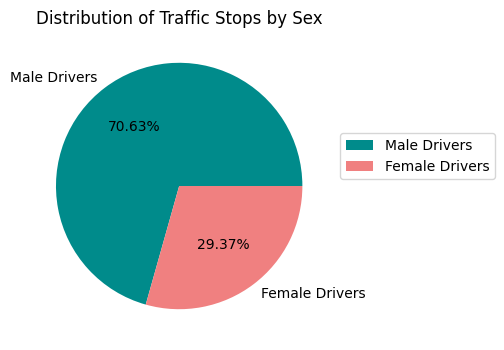

In [ ]:
male = sex_counts.iloc[0]
female = sex_counts.iloc[1]

plt.figure(figsize=(4, 4), dpi=100)

plt.pie([male, female], labels=['Male Drivers', 'Female Drivers'], colors=['darkcyan', 'lightcoral'], autopct='%1.2f%%')
plt.legend(loc='lower left', bbox_to_anchor=(1,0.5))
plt.title('Distribution of Traffic Stops by Sex')

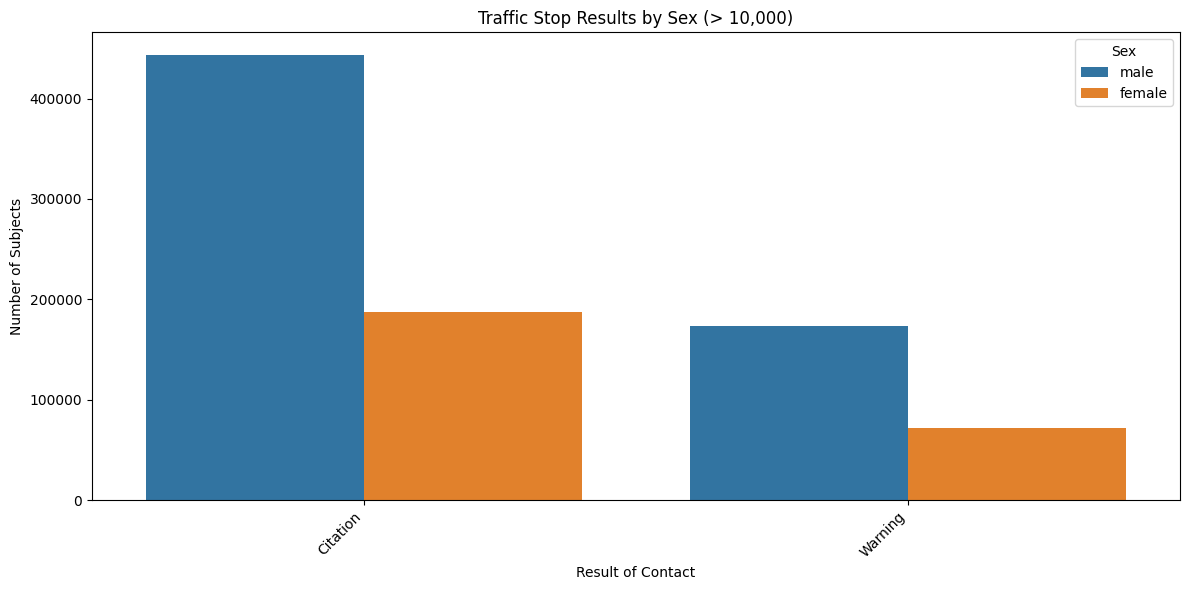

In [ ]:
large_counts = subject_result_sex[subject_result_sex['count'] > 10000]
# plot large counts
plt.figure(figsize=(12, 6))
sns.barplot(
    data=large_counts,
    x='raw_result_of_contact_description',
    y='count',
    hue='subject_sex'
)
plt.title('Traffic Stop Results by Sex (> 10,000)')
plt.xlabel('Result of Contact')
plt.ylabel('Number of Subjects')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Sex')
plt.show()

This finding of 70% of drivers stopped by police being male is reflected in the resulting distribution of traffic stop outcomes discovered from our EDA (copied above). This could demonstrate that male drivers are worse at abiding by traffic laws. By volume men are overwhelmingly leaders when it comes to being stopped.

This then raised the question of are there simply more men driving then women. This was evaluated with a new data set below.

In [ ]:
drivers_info_df = pd.read_csv('/content/drive/MyDrive/CS 410 Data w  Python/Licensed_drivers_By_State.csv')
drivers_info_df.head()

# group drivers_info_df by california
drivers_info_df = drivers_info_df[drivers_info_df['State'] == 'California']

drivers_info_df = drivers_info_df[(drivers_info_df['Year'] >= 2007) & (drivers_info_df['Year'] <= 2016)]
drivers_info_df

gender_totals = drivers_info_df.groupby('Gender')['Drivers'].sum().reset_index()

female_total = gender_totals.loc[gender_totals['Gender'] == 'Female', 'Drivers'].values[0]
male_total = gender_totals.loc[gender_totals['Gender'] == 'Male', 'Drivers'].values[0]

# calculate percentage difference (Male vs. Female)
percent_diff = ((male_total - female_total) / female_total) * 100

print("Total Female Drivers:", female_total)
print("Total Male Drivers:", male_total)
print("Percentage Difference (Male vs. Female): {:.2f}%".format(percent_diff))


Total Female Drivers: 119802510.0
Total Male Drivers: 123840919.0
Percentage Difference (Male vs. Female): 3.37%


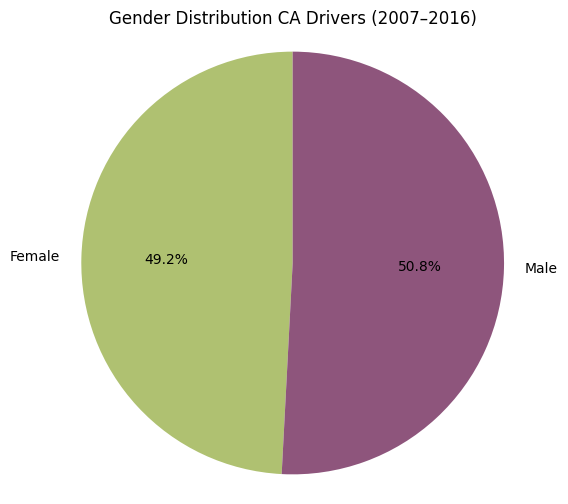

In [ ]:
# data for chart
labels = ['Female', 'Male']
sizes = [female_total, male_total]
colors = ['#AFC171', '#8E557C']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Gender Distribution CA Drivers (2007–2016)')
plt.axis('equal')

plt.show()

Based on this evaluation there is a 1.6% difference in the sex of drivers. Accounting for 4,038,409 more male drivers than female within 2007-2016. A small percentage in the scheme of things. This likely will not affect the driver distribution substantially. A limitation here is this data set looks at the entirety of California, not just San Francisco.

To conclude, these findings do indicate that male drivers are more likely to commit traffic infractions, and shows strong correlation to the conclusion that men are worse drivers in San Francisco. Considering question 8, we may note that of the drivers stopped in general, the results tend to be the same.

__10. Where are all these traffic stops occurring?__


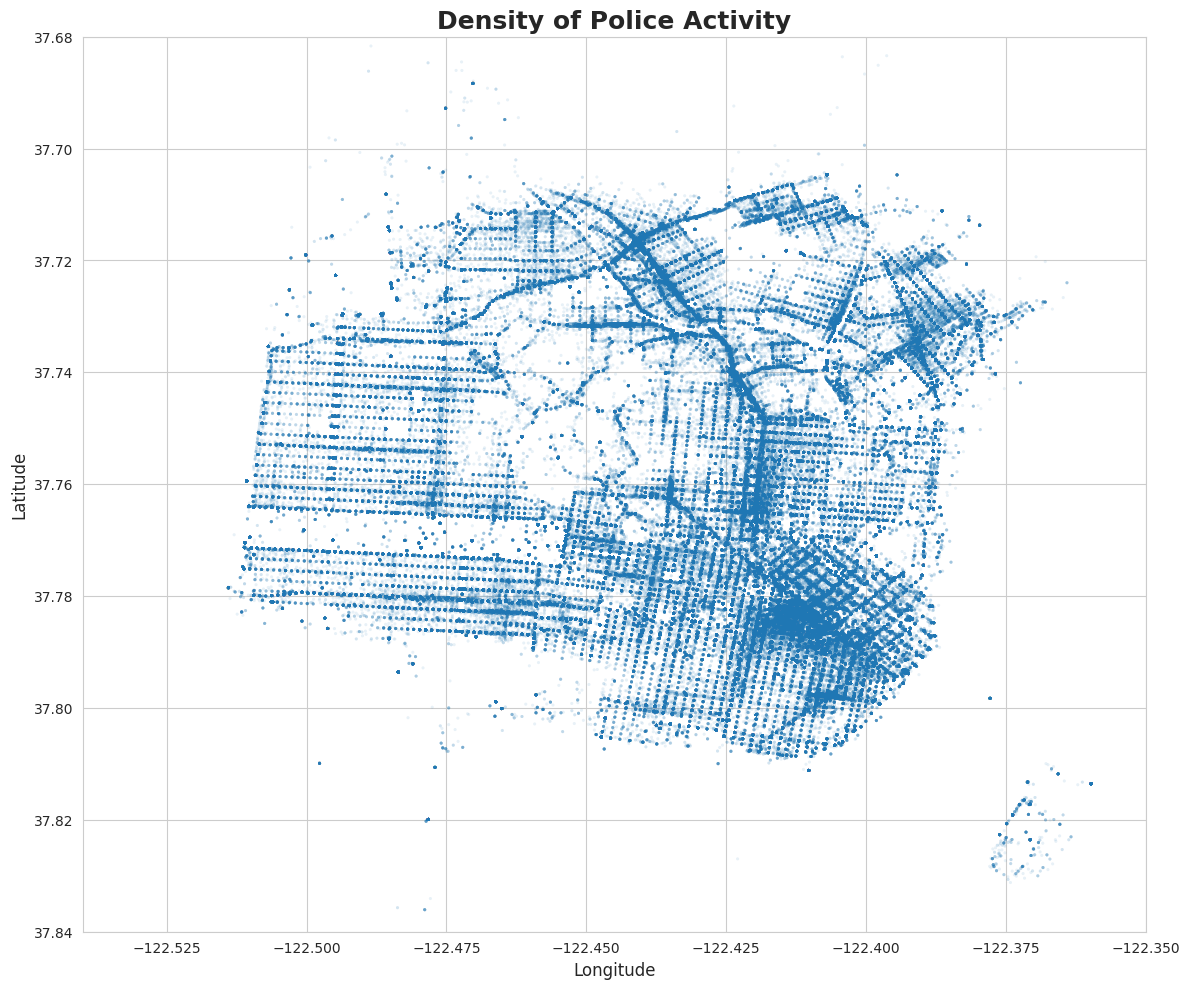

In [ ]:
unaltered_set = san_fran_df.copy()

sns.set_style("whitegrid")

plt.figure(figsize=(12, 12))

ax = sns.scatterplot(
    data=unaltered_set,
    x='lng',
    y='lat',
    alpha=0.1,
    s=5,
    edgecolor='none'
)

ax.set_title('Density of Police Activity', fontsize=18, weight='bold')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_xlim(-122.54, -122.35)
ax.set_ylim(37.84, 37.68)

ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

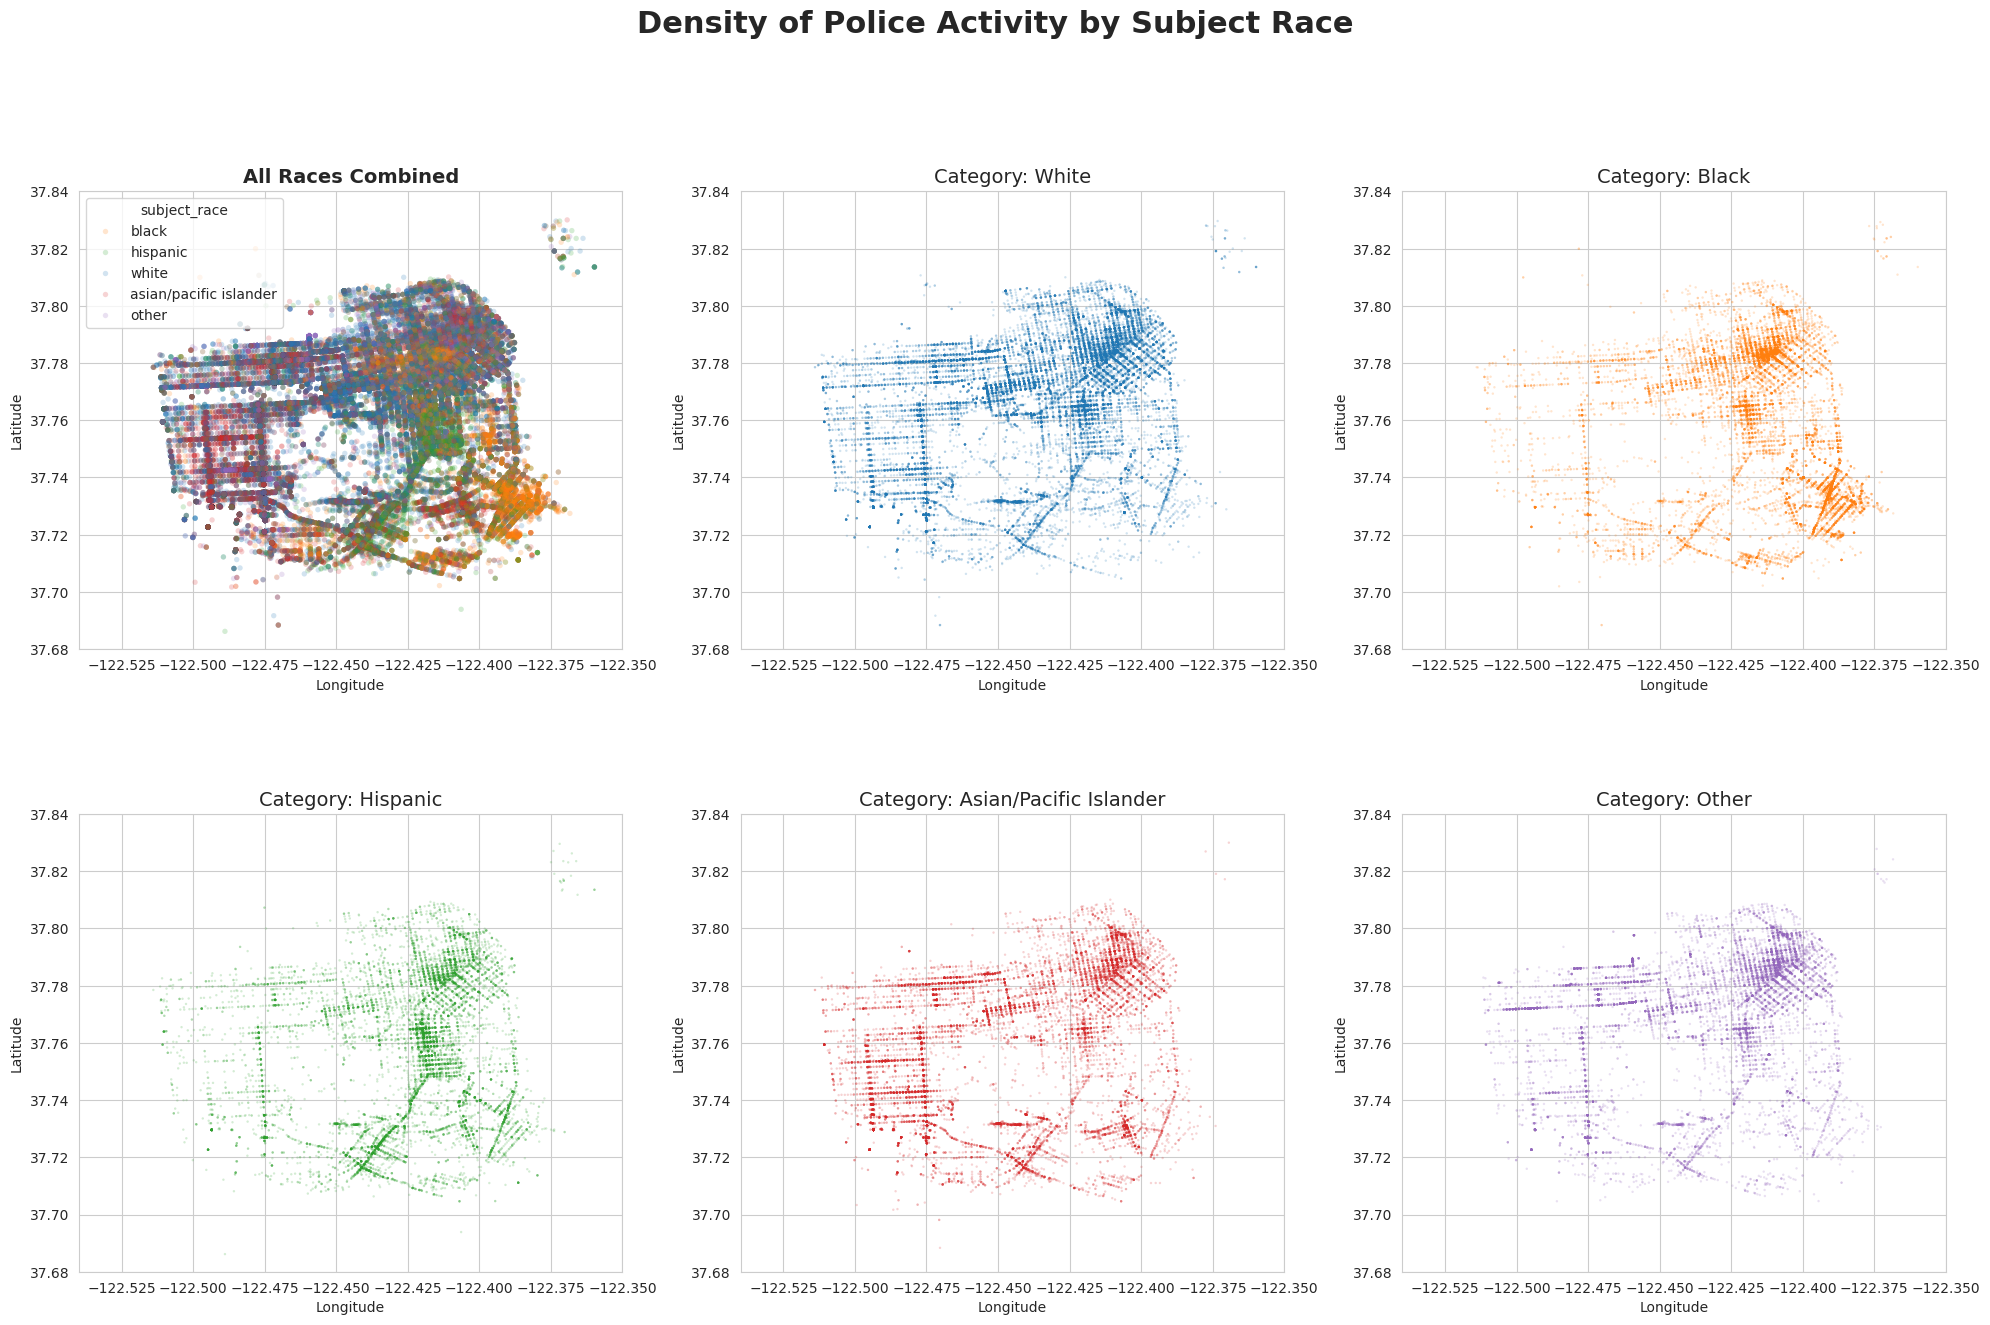

In [ ]:
unaltered_set['date'] = pd.to_datetime(unaltered_set['date'])
unaltered_set = unaltered_set[unaltered_set['date'].dt.year == 2015].copy()

race_colors = {'white': '#1f77b4',
               'black': '#ff7f0e',
               'hispanic': '#2ca02c',
               'asian/pacific islander': '#d62728',
               'other': '#9467bd'}

races = ['white', 'black', 'hispanic', 'asian/pacific islander', 'other']

sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(20, 14))
ax_flat = axes.flatten()

ax_all = ax_flat[0]
sns.scatterplot(
    data=unaltered_set,
    x='lng',
    y='lat',
    hue='subject_race',
    palette=race_colors,
    alpha=0.2,
    s=15,
    edgecolor='none',
    ax=ax_all,
    legend=True
)
ax_all.set_title('All Races Combined', fontsize=14, weight='bold')

for i, race in enumerate(races, 1):
    ax = ax_flat[i]

    race_df = unaltered_set[unaltered_set['subject_race'] == race]

    sns.scatterplot(
        data=race_df,
        x='lng',
        y='lat',
        alpha=0.2,
        s=3,
        edgecolor='none',
        color=race_colors[race],
        ax=ax,
        legend=False
    )
    ax.set_title(f'Category: {race.title()}', fontsize=14)

for ax in ax_flat:
    ax.set_xlim(-122.54, -122.35)
    ax.set_ylim(37.68, 37.84)

    ax.set_xlabel('Longitude', fontsize=10)
    ax.set_ylabel('Latitude', fontsize=10)
    ax.set_aspect('equal', adjustable='box')

fig.suptitle('Density of Police Activity by Subject Race', fontsize=22, weight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


When it came to plotting data we chose 2015 to track police activity over 1 year where the population demographics wouldn't change too much overtime. As SF has faced gentrification and pushed around certain groups out of the city in general. <br><br>
Without familiarity of the San Francisco districts and living demographics there aren't many statement to make here related to whether police patrol certain neighborhoods more than others. But we can note that White and Asian people seem to be arrested significantly more on the West side of SF (which at a cursosry google search is a conservative, older, suburban-ish demographic), whereas we see heightened activity for Black people in SE SF, near what appears to be a historically black neighborhood, Bayview-Hunters Point. Hispanic populations appearing to meet in the Mission District.<br><br>
When looking at the map of all races traffic stops we do see a divide when it comes to neighborhood demographics. With further research we'd like to peer into the number of patrols at any given time in said neighborhoods. We already have breakdowns of how often each race was stopped, but we would've also liked to explore how many stops exactly occurred in each district. are they somewhat equal or are other locations overrepresented?

## 5. Conclusion

Limitations, Challenges, and Discussion:<br>
Given we performed static analysis of traffic *stop* data, whenever we want to make conclusions relating to population demographics one needs to look at outside sources for that representative information (census, drivers license records, etc). This makes it hard to have truly representative data, especially when you consider that the census is only every decade, and that not all drivers even have a license. Every question feels like it requires further interpolation of outside sources, especially if the goal is to recognzie bias within a police force.<br><br>

Scope of our analysis is also something that one could have narrowed down. Male vs Female analysis could be its own notebook or research paper, analysis performed on a race basis could've been its own notebook, analysis of things like how date and time affected traffic stops would likely have been better served by comparing San Francisco/California based PD to other cities and States. For example we did not find that police quotas or the supposed existence of them seemed to be present in San. Fran. PD, but this is also outlawed in California alongside limitations in 25 other States. What would we see if we observed statistics for a city not within one of these states?<br><br>

One personal gripe is that this is all also correlational/pattern observation levels of scrutiny. Any count, rate, or observation likely has deep ties to other underlying factors not easily seen simply with numbers. Interdisciplinary study between fields of psychology and data science could have a field day here. It's nigh impossible to make any conclusive statements without further research. The topic could have taken up a whole term, let alone a few weeks. Here are some questions we would have liked to pursue further given infite time:
- Are police disproportionately in certain neighborhoods, of race or wealth?
- Who is getting off with all these warnings? What do these interactions look like? Is getting off with a warning just a guise for "I stopped you but found no real reason to cite you"?
- Are men truly 20% "worse" at driving than woman or is a cop biased and more likely to stop men? There exists this sexist stereotype that woman can't drive, how does this play into things, especially when stats seem to show the opposite?
- How do statistics look between small and large cities within a state, how about LAPD vs NYPD. In a "notoriously" cop unfriendly city like Portland vs a recognized force like Georgia State Patrol?
<br><br>

What can we say overall:<br><br>
Many of the issues documented above relate to not being able to make definitive statements, but here are patterns we observed that are hard not to mention.
- Male drivers are 70 % of San Francisco traffic stops, Female drivers make up 30 %, other groups were not represented in the dataset
- Of these 2 groups, the rates for which they were stopped and results of their stop remained about the same
- In SF we did not see evidence of police quotas influencing rates throughout any given month
- We did see that more arrests were made in Winter and Spring, causation unknown
- A citation was issued in most cases, with warnings being the 2nd most common result. Except in the case of a traffic collision were no-further-action took its place
- Younger demographics appear to be stopped and faced citations/arrest more often than older demographics<br><br>
In short, dudes kinda suck at driving, young people do too. Sex and race do not seem to affect the outcome of a traffic stop but do heavily change the rates at which they happen respective to their actual population rates.

In [ ]:
# !pip install nbconvert >/dev/null
# !apt-get install texlive texlive-xetex texlive-latex-extra pandoc >/dev/null
# !apt-get install texlive texlive-xetex texlive-latex-extra pandoc >/dev/null
# !jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/410 Group Project.ipynb" >/dev/null